# Home Credit Scorecard Model

## Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.13.0


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### Main Dataset

In [3]:
#### Data Application (Train)

In [4]:
df = pd.read_csv('application_train.csv')
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
272234,415617,0,Cash loans,F,N,Y,0,108000.0,76410.0,7686.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
121681,241074,0,Cash loans,F,Y,Y,0,135000.0,1288350.0,37800.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
34090,139499,0,Cash loans,F,Y,Y,2,270000.0,1483231.5,51687.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
72458,184028,0,Cash loans,F,Y,Y,0,135000.0,573628.5,27724.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
109444,226927,0,Cash loans,M,Y,Y,1,202500.0,1433367.0,60858.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

### Check Data Types

In [5]:
# shape data
print('df Shape:', df.shape)

df Shape: (307511, 122)


In [6]:
# info fitur dan tipe data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# kolom values
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Visualization

In [9]:
df_t = df.copy()

#### Univariate Analysis

In [10]:
len(df_t[df.TARGET == 0])/len(df)*100
# sebanyak 91.92% membayar angsuran dengan lancar dan 8.07% tidak lancar

91.92711805431351

In [11]:
df_t_target = (df_t[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )
df_t_target

,TARGET,COUNT
0,0,282686
1,1,24825


In [12]:
df_t_index = df_t['TARGET'].value_counts(normalize=True)
df_t_index.reset_index()

,index,TARGET
0,0,0.919271
1,1,0.080729


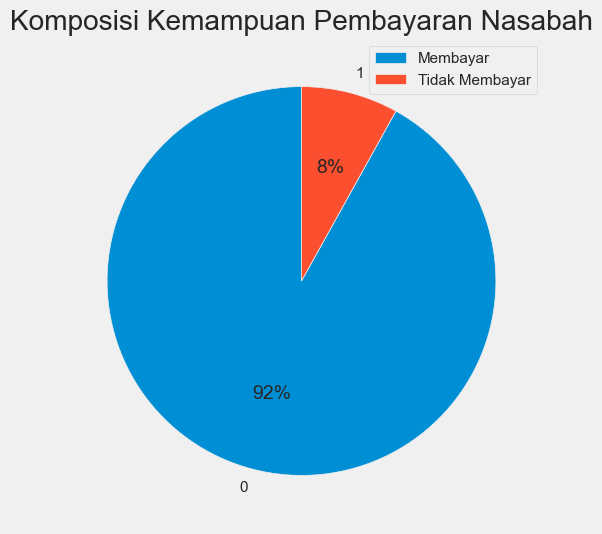

In [13]:
plt.figure(figsize=(6, 6))
target_counts = df_t['TARGET'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Komposisi Kemampuan Pembayaran Nasabah')
plt.legend(labels=['Membayar', 'Tidak Membayar'], loc='upper right')

plt.show()

#### Bivariate Analysis

##### Contract Type, Gender, Car Ownership Status, dan Realty Ownership Status Vs Target

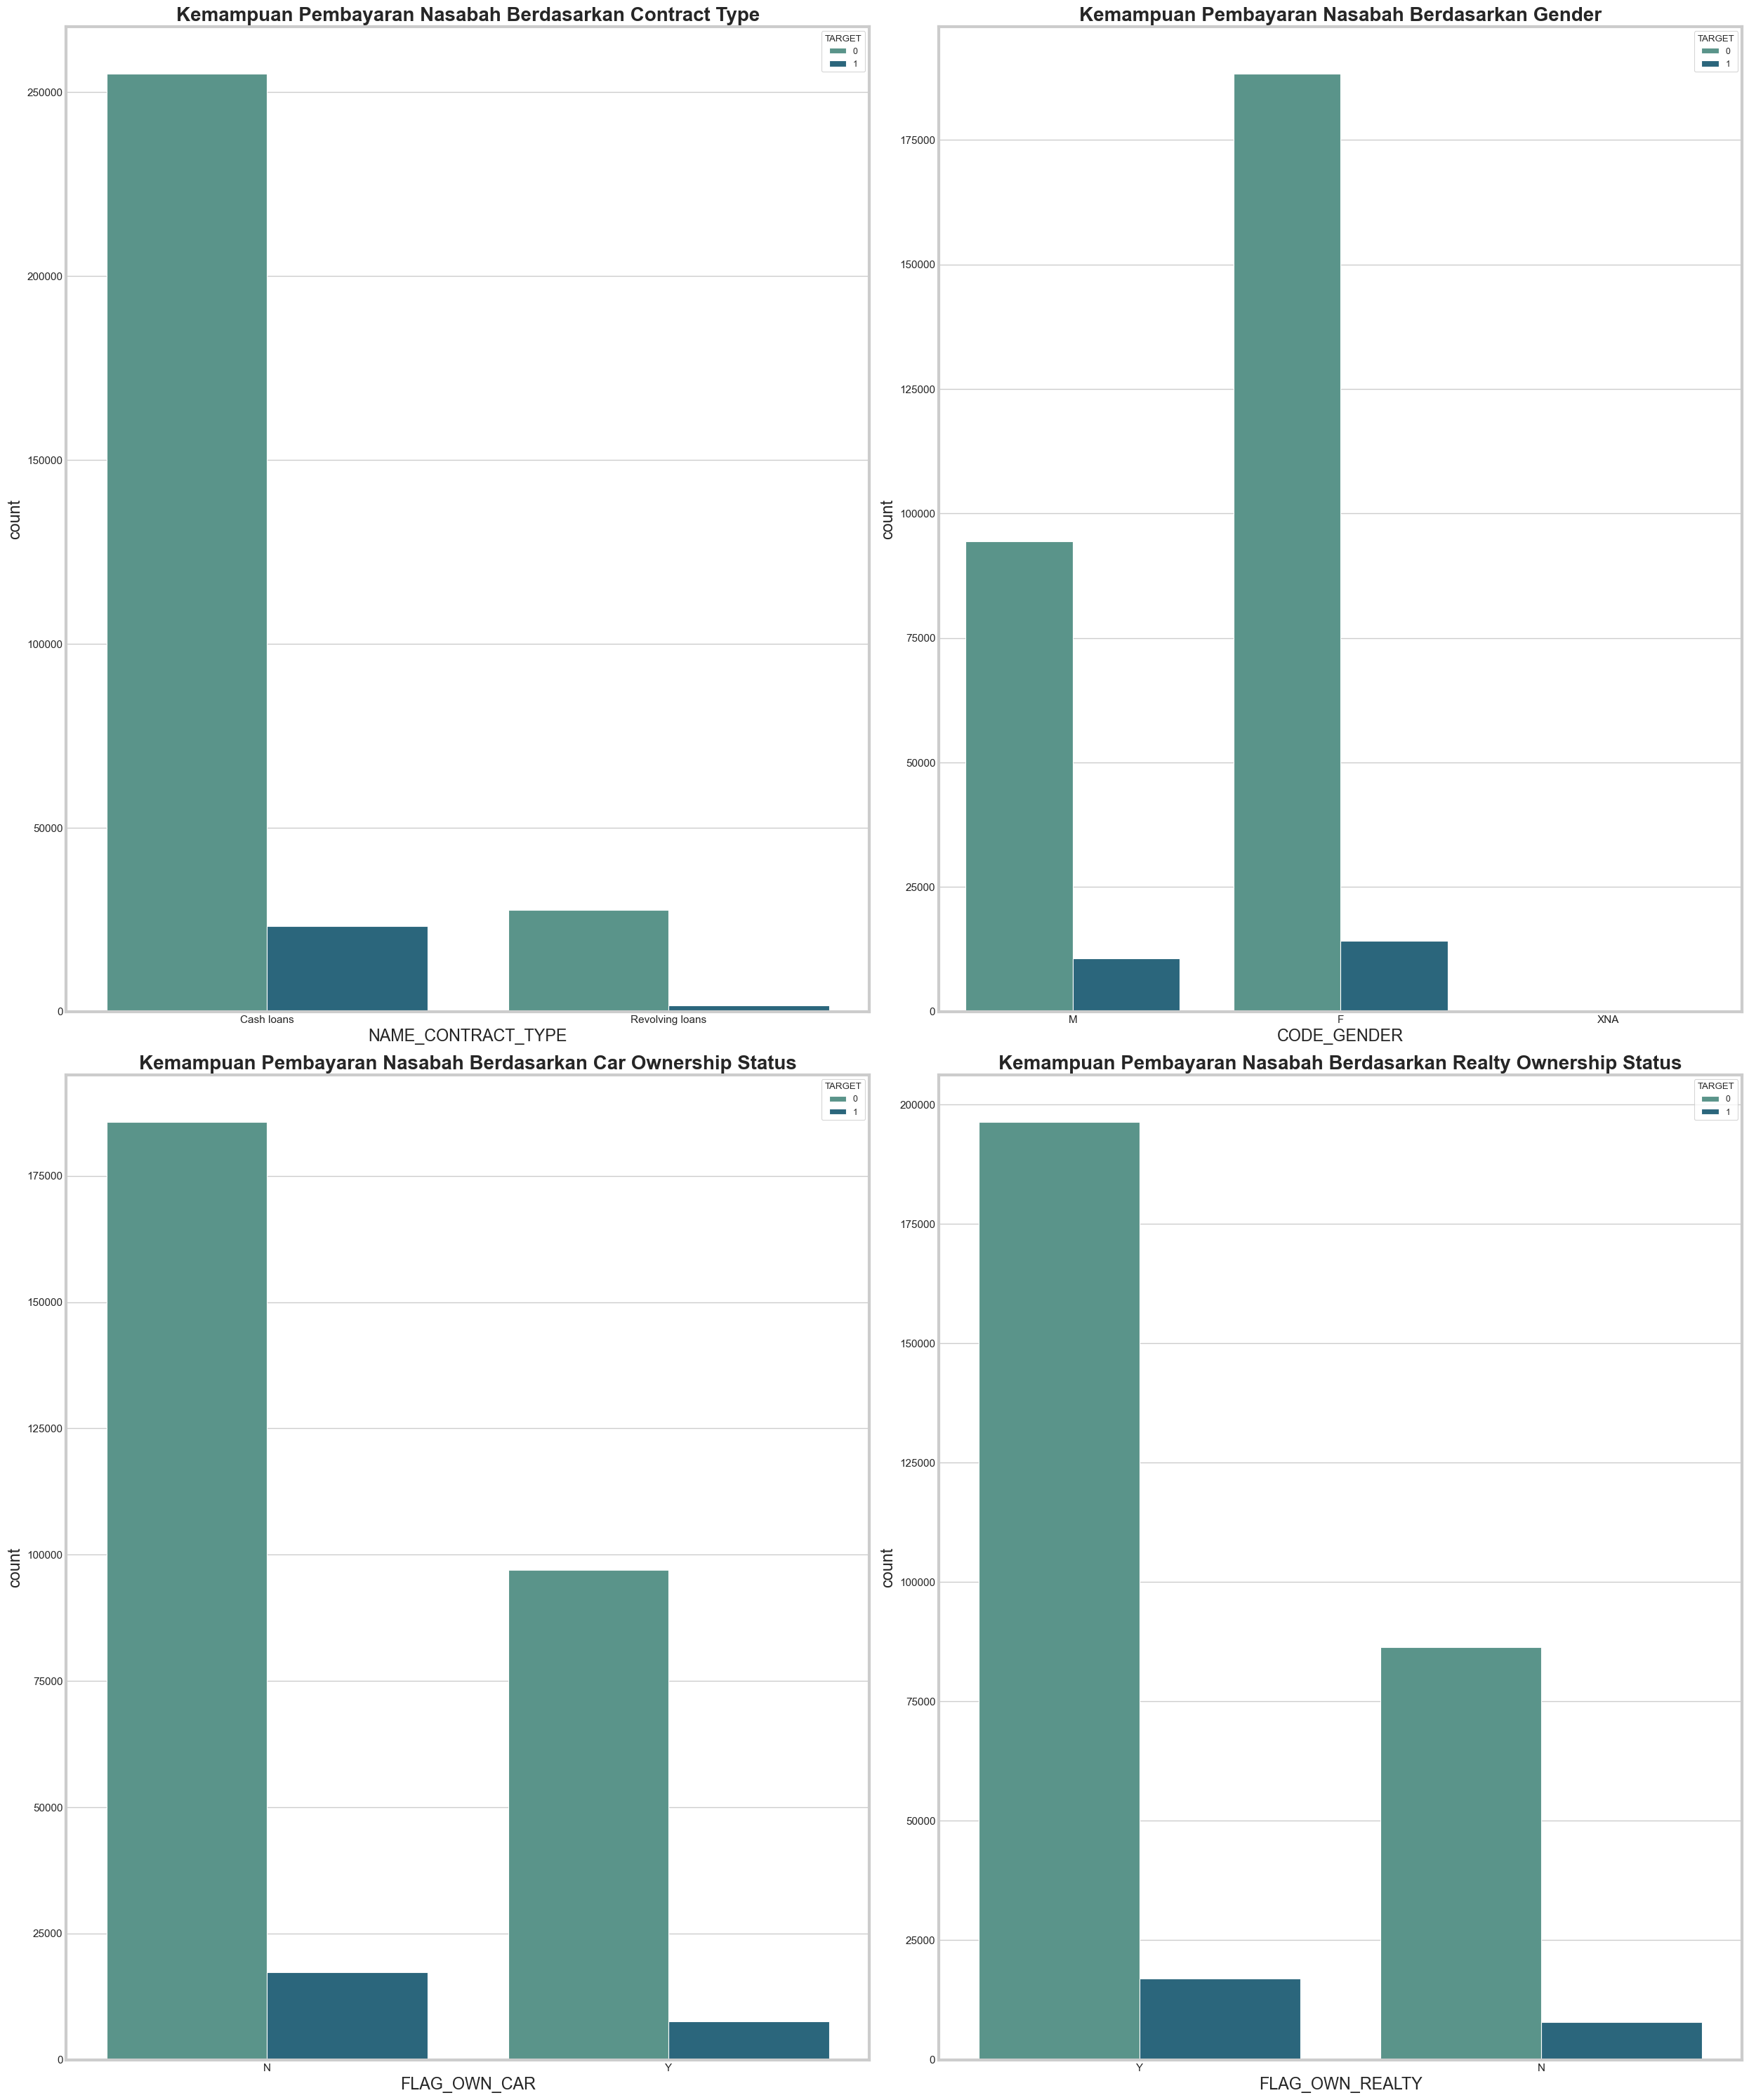

In [14]:
sns.set_style('whitegrid')

# Membuat subplots dengan ukuran tertentu
fig, ax = plt.subplots(2, 2, figsize=(25, 30))

# Mengatur konteks plot sebagai 'paper' dengan skala font 1
sns.set_context('paper', font_scale=1)

# Daftar judul-judul plot
titles = [
    'Kemampuan Pembayaran Nasabah Berdasarkan Contract Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Gender',
    'Kemampuan Pembayaran Nasabah Berdasarkan Car Ownership Status',
    'Kemampuan Pembayaran Nasabah Berdasarkan Realty Ownership Status'
]

# Daftar kolom untuk masing-masing plot
columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Melakukan plotting dengan loop untuk setiap subplot
for i in range(4):
    # Menetapkan judul untuk setiap subplot
    ax[i // 2][i % 2].set_title(titles[i], fontweight='bold', fontsize=20)
    
    # Melakukan countplot untuk setiap subplot
    sns.countplot(x=columns[i], data=df_t, hue='TARGET', palette='crest', ax=ax[i // 2][i % 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [15]:
### Contract Type Vs Target
df_ct = df_t.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_ct_sorted = df_ct.sort_values(by='SK_ID_CURR', ascending=False)
df_ct_sorted

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
2,Revolving loans,0,27675
1,Cash loans,1,23221
3,Revolving loans,1,1604


In [16]:
### Gender Vs Target
df_gt = df_t.groupby(by=['CODE_GENDER', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_gt_sorted = df_gt.sort_values(by='SK_ID_CURR', ascending=False)
df_gt_sorted

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
2,M,0,94404
1,F,1,14170
3,M,1,10655
4,XNA,0,4


In [17]:
gender_repayment_mean = df_t[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
gender_repayment_mean_sorted = gender_repayment_mean.sort_values(by=['TARGET'], ascending=False)

gender_repayment_mean_sorted

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


In [18]:
### FLAG_OWN_CAR Vs Target
df_foc = df_t.groupby(by=['FLAG_OWN_CAR', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_foc_sorted = df_foc.sort_values(by='SK_ID_CURR', ascending=False)
df_foc_sorted

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,0,185675
2,Y,0,97011
1,N,1,17249
3,Y,1,7576


In [19]:
car_repayment_mean = df_t[['FLAG_OWN_CAR', 'TARGET']].groupby(['FLAG_OWN_CAR'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
car_repayment_mean_sorted = car_repayment_mean.sort_values(by=['TARGET'], ascending=False)

car_repayment_mean_sorted

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


In [20]:
### Realty Ownership Status Vs Target
df_ros = df_t.groupby(by=['FLAG_OWN_REALTY', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_ros_sorted = df_ros.sort_values(by='SK_ID_CURR', ascending=False)
df_ros_sorted

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
2,Y,0,196329
0,N,0,86357
3,Y,1,16983
1,N,1,7842


In [21]:
ros_repayment_mean = df_t[['FLAG_OWN_REALTY', 'TARGET']].groupby(['FLAG_OWN_REALTY'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
ros_repayment_mean_sorted = ros_repayment_mean.sort_values(by=['TARGET'], ascending=False)

ros_repayment_mean_sorted

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


##### Suite Type, Income Type, Education Type, dan Family Status vs Target

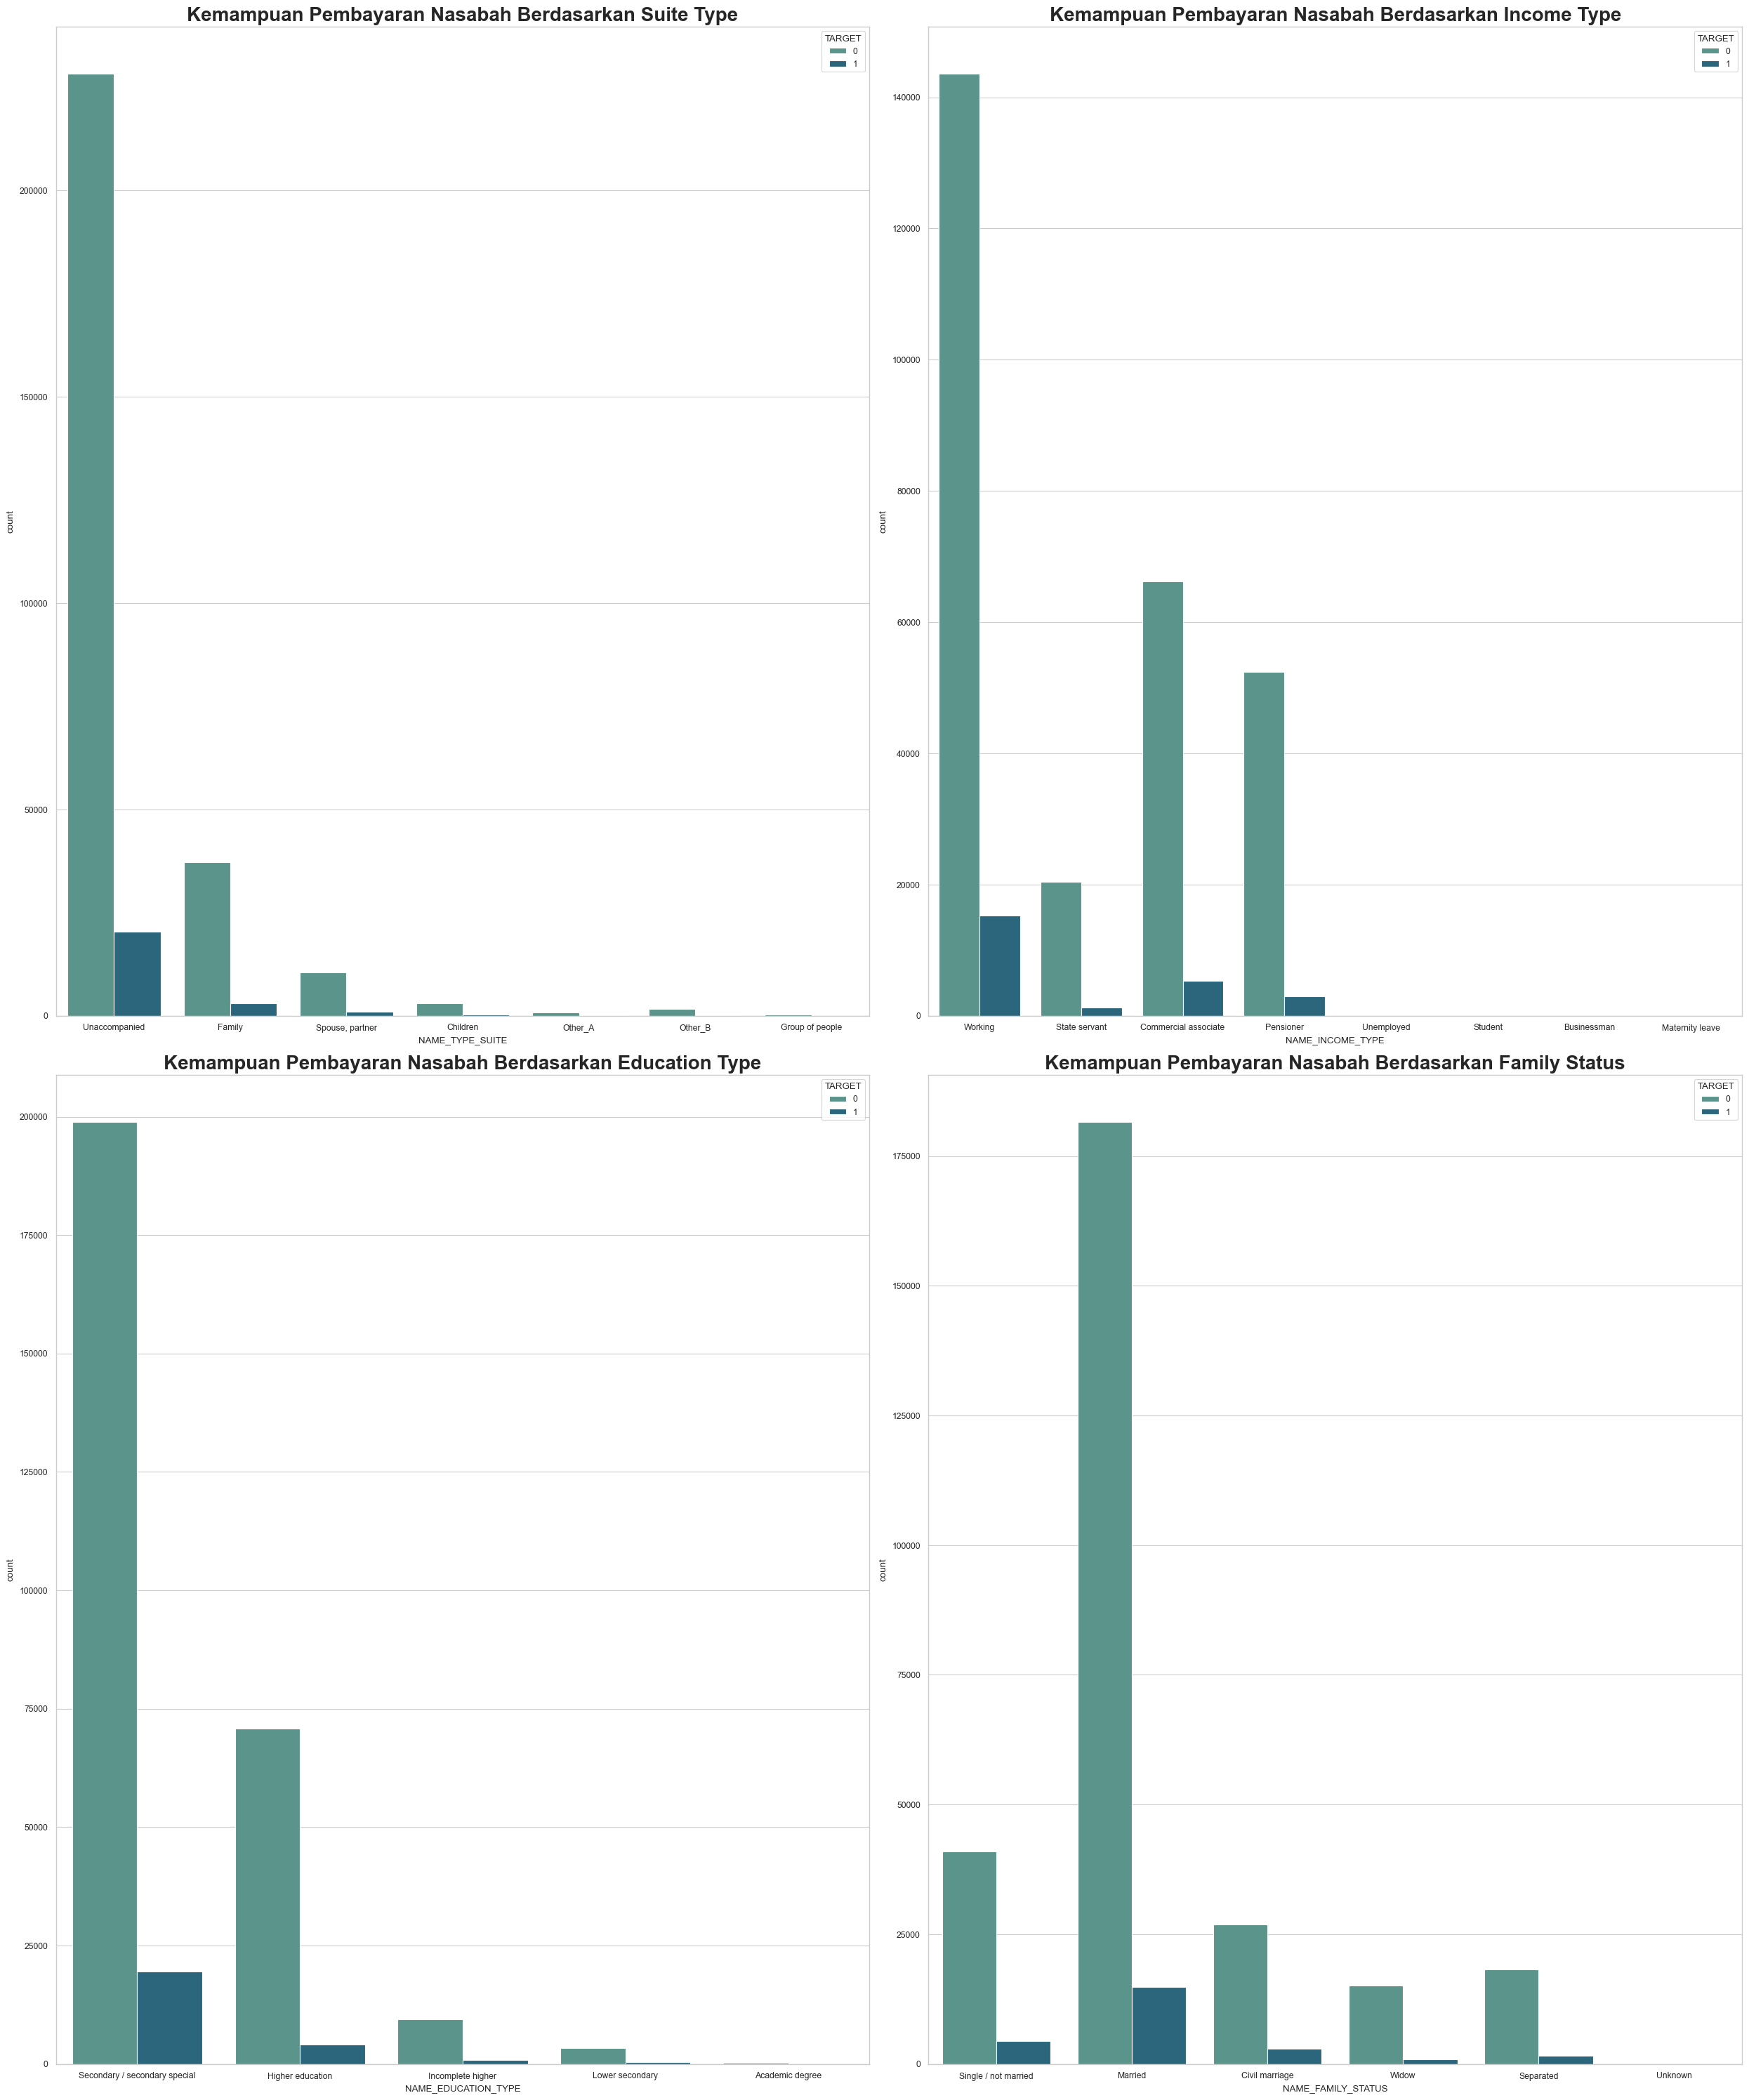

In [22]:
sns.set_style('whitegrid')

# Membuat subplots dengan ukuran tertentu
fig, ax = plt.subplots(2, 2, figsize=(25, 30))

# Mengatur konteks plot sebagai 'paper' dengan skala font 1
sns.set_context('paper', font_scale=1)

# Daftar judul-judul plot
titles = [
    'Kemampuan Pembayaran Nasabah Berdasarkan Suite Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Income Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Education Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Family Status'
]

# Daftar kolom untuk masing-masing plot
columns = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

# Melakukan plotting dengan loop untuk setiap subplot
for i in range(4):
    # Menetapkan judul untuk setiap subplot
    ax[i // 2][i % 2].set_title(titles[i], fontweight='bold', fontsize=20)
    
    # Melakukan countplot untuk setiap subplot
    sns.countplot(x=columns[i], data=df_t, hue='TARGET', palette='crest', ax=ax[i // 2][i % 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [23]:
df_st = df_t.groupby(by=['NAME_TYPE_SUITE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_st_sorted = df_st.sort_values(by='SK_ID_CURR', ascending=False)
df_st_sorted

,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,0,228189
2,Family,0,37140
13,Unaccompanied,1,20337
10,"Spouse, partner",0,10475
0,Children,0,3026
3,Family,1,3009
8,Other_B,0,1596
11,"Spouse, partner",1,895
6,Other_A,0,790
4,Group of people,0,248


In [24]:
st_repayment_mean = df_t[['NAME_TYPE_SUITE', 'TARGET']].groupby(['NAME_TYPE_SUITE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
st_repayment_mean_sorted = st_repayment_mean.sort_values(by=['TARGET'], ascending=False)

st_repayment_mean_sorted

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


In [25]:
df_nit = df_t.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_nit_sorted = df_nit.sort_values(by='SK_ID_CURR', ascending=False)
df_nit_sorted

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,0,143550
1,Commercial associate,0,66257
5,Pensioner,0,52380
7,State servant,0,20454
13,Working,1,15224
2,Commercial associate,1,5360
6,Pensioner,1,2982
8,State servant,1,1249
9,Student,0,18
10,Unemployed,0,14


In [26]:
nit_repayment_mean = df_t[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
nit_repayment_mean_sorted = nit_repayment_mean.sort_values(by=['TARGET'], ascending=False)
nit_repayment_mean_sorted

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


In [27]:
df_net = df_t.groupby(by=['NAME_EDUCATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_net_sorted = df_net.sort_values(by='SK_ID_CURR', ascending=False)
df_net_sorted

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,0,198867
2,Higher education,0,70854
9,Secondary / secondary special,1,19524
4,Incomplete higher,0,9405
3,Higher education,1,4009
6,Lower secondary,0,3399
5,Incomplete higher,1,872
7,Lower secondary,1,417
0,Academic degree,0,161
1,Academic degree,1,3


In [28]:
net_repayment_mean = df_t[['NAME_EDUCATION_TYPE', 'TARGET']].groupby(['NAME_EDUCATION_TYPE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
net_repayment_mean_sorted = net_repayment_mean.sort_values(by=['TARGET'], ascending=False)
net_repayment_mean_sorted

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


tingkat pendidikan Academic Degree memiliki tingkat keberhasilan paling tinggi dalam pembayaran dengan 161 sukses bayar dan hanya 3 kasus gagal bayar lalu tingkat pendidikan Secondary / secondary special memiliki tingkat gagal bayar tertinggi sebanyak 19524 dengan keberhasil bayar 198867.

In [29]:
df_nfs = df_t.groupby(by=['NAME_FAMILY_STATUS', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_nfs_sorted = df_nfs.sort_values(by='SK_ID_CURR', ascending=False)
df_nfs_sorted

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,0,181582
6,Single / not married,0,40987
0,Civil marriage,0,26814
4,Separated,0,18150
9,Widow,0,15151
3,Married,1,14850
7,Single / not married,1,4457
1,Civil marriage,1,2961
5,Separated,1,1620
10,Widow,1,937


In [30]:
nfs_repayment_mean = df_t[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
nfs_repayment_mean_sorted = nfs_repayment_mean.sort_values(by=['TARGET'], ascending=False)
nfs_repayment_mean_sorted

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


##### Housing Type, Occupation Type, Process Day, dan Organization Type vs Target

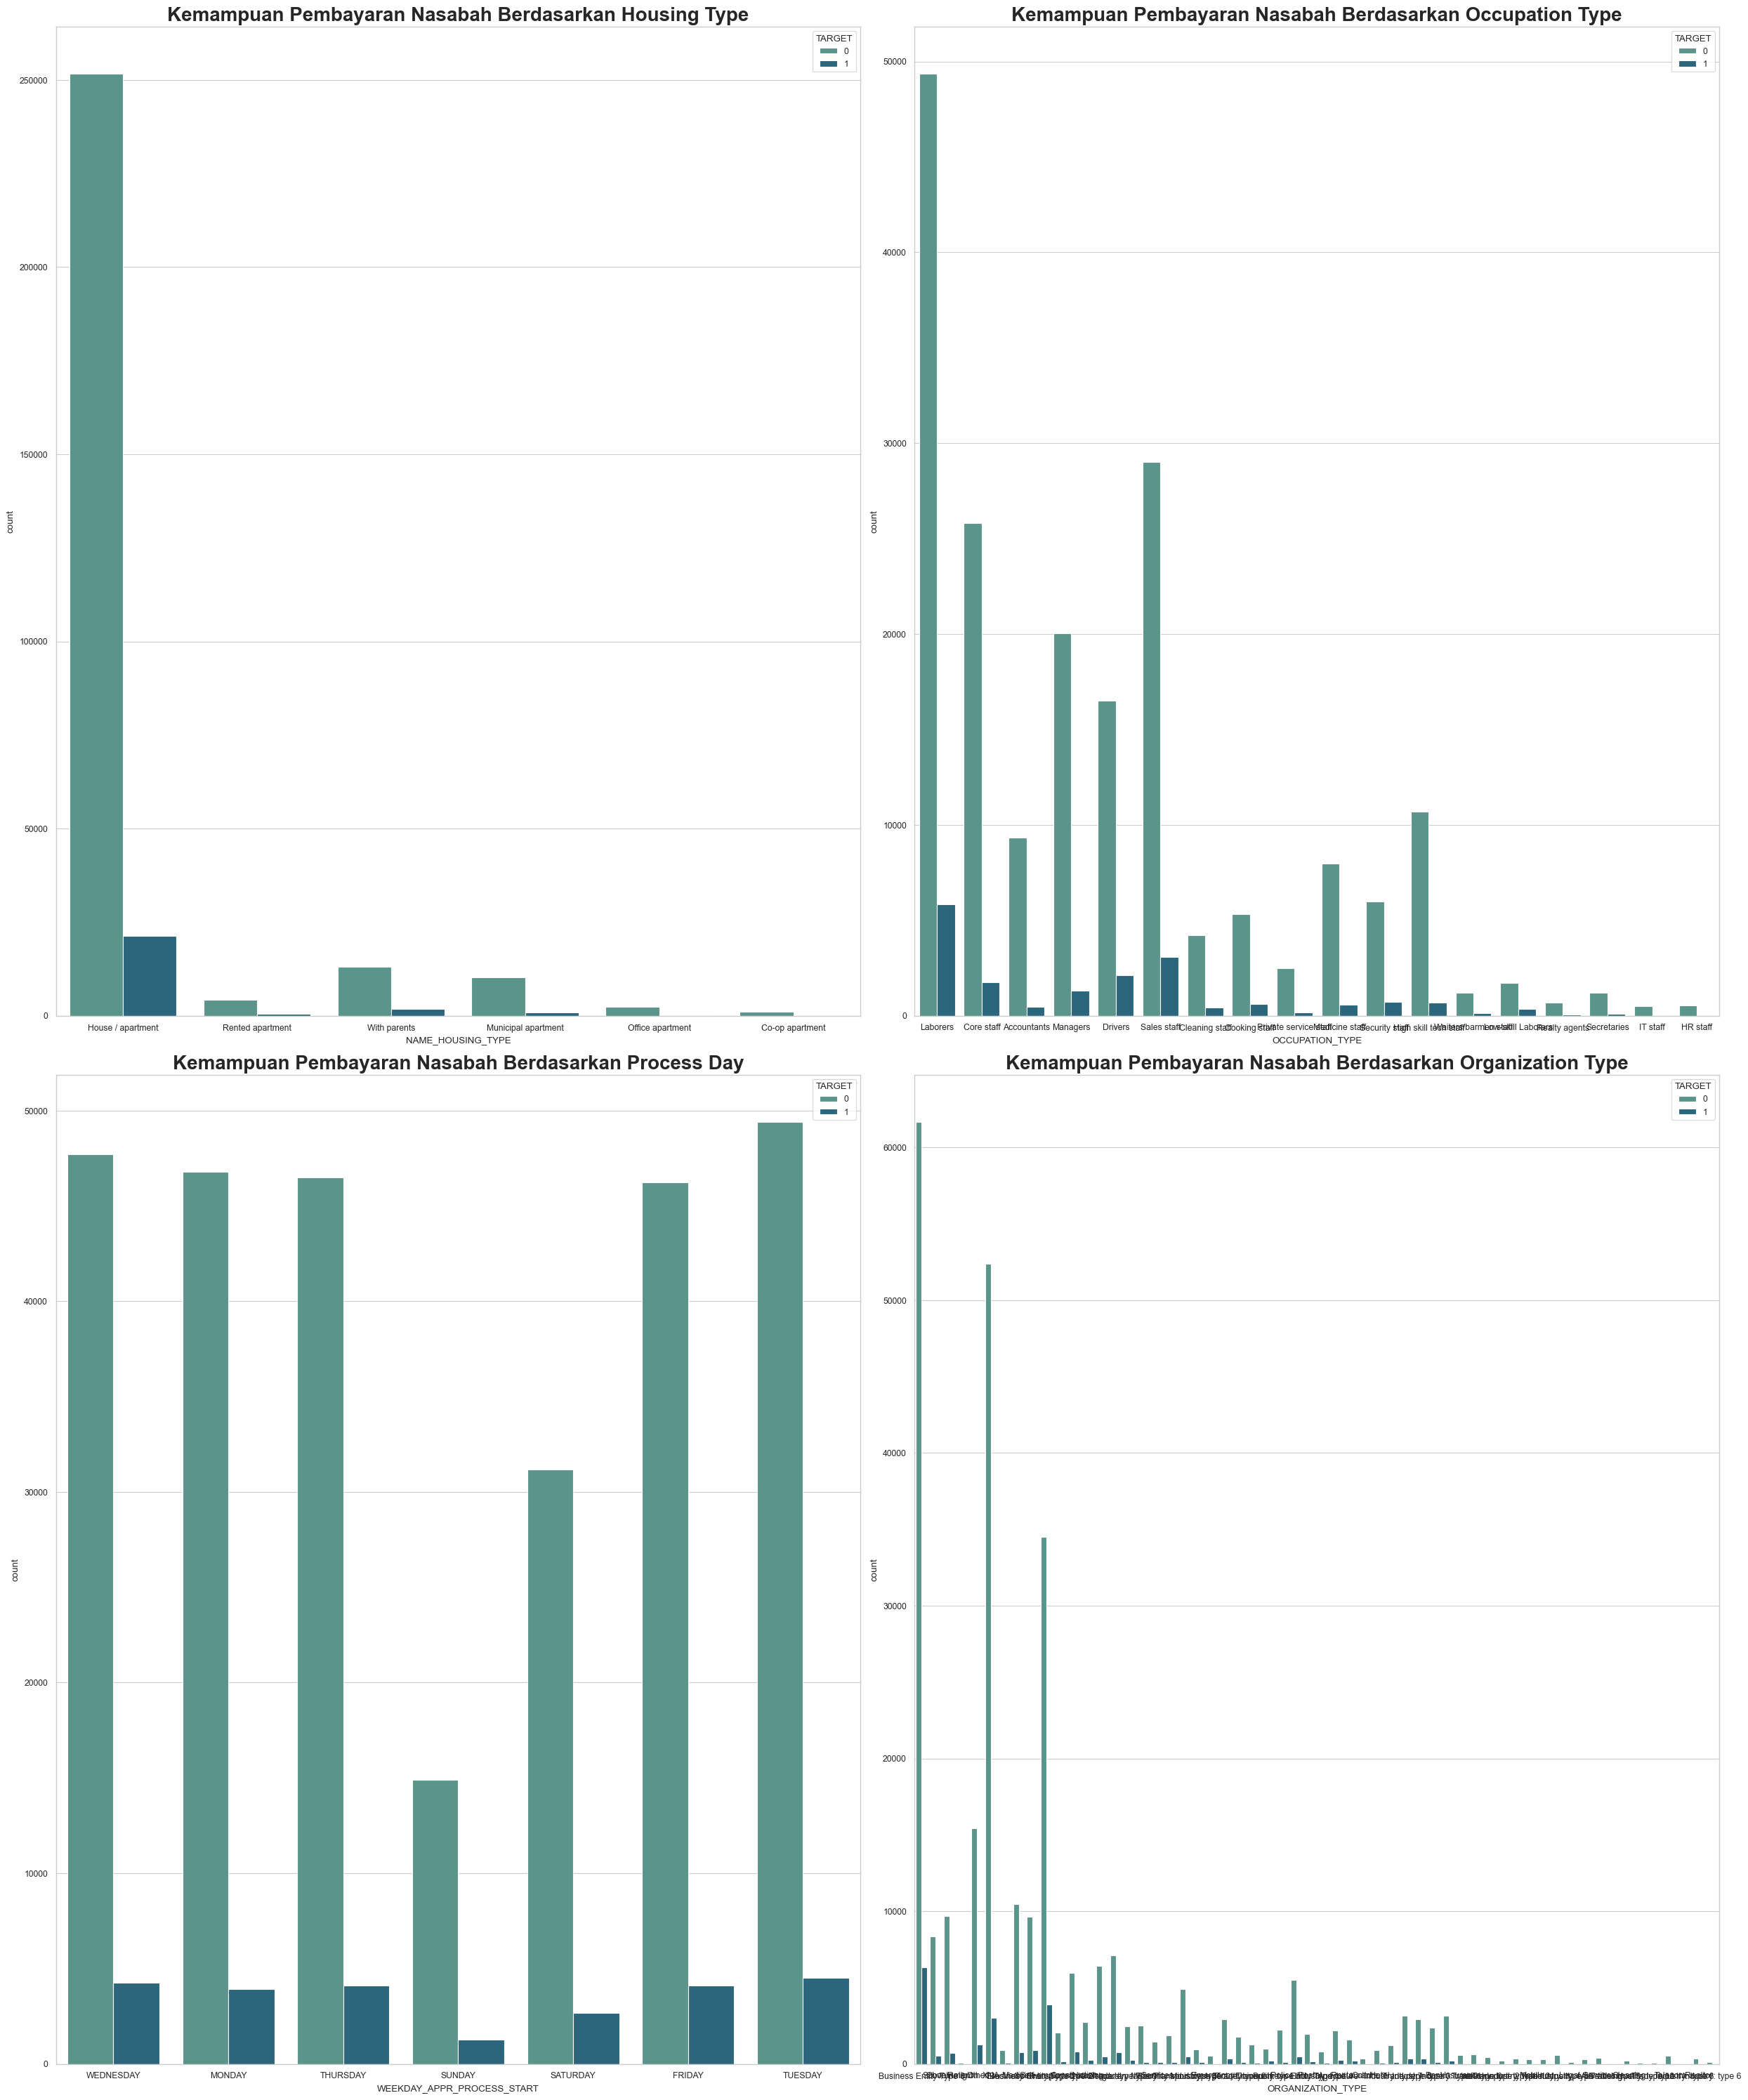

In [31]:
sns.set_style('whitegrid')

# Membuat subplots dengan ukuran tertentu
fig, ax = plt.subplots(2, 2, figsize=(25, 30))

# Mengatur konteks plot sebagai 'paper' dengan skala font 1
sns.set_context('paper', font_scale=1)

# Daftar judul-judul plot
titles = [
    'Kemampuan Pembayaran Nasabah Berdasarkan Housing Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Occupation Type',
    'Kemampuan Pembayaran Nasabah Berdasarkan Process Day',
    'Kemampuan Pembayaran Nasabah Berdasarkan Organization Type'
]

# Daftar kolom untuk masing-masing plot
columns = ['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

# Melakukan plotting dengan loop untuk setiap subplot
for i in range(4):
    # Menetapkan judul untuk setiap subplot
    ax[i // 2][i % 2].set_title(titles[i], fontweight='bold', fontsize=20)
    
    # Melakukan countplot untuk setiap subplot
    sns.countplot(x=columns[i], data=df_t, hue='TARGET', palette='crest', ax=ax[i // 2][i % 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [32]:
df_nht = df_t.groupby(by=['NAME_HOUSING_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_nht_sorted = df_nht.sort_values(by='SK_ID_CURR', ascending=False)
df_nht_sorted

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,0,251596
3,House / apartment,1,21272
10,With parents,0,13104
4,Municipal apartment,0,10228
8,Rented apartment,0,4280
6,Office apartment,0,2445
11,With parents,1,1736
0,Co-op apartment,0,1033
5,Municipal apartment,1,955
9,Rented apartment,1,601


In [33]:
nht_repayment_mean = df_t[['NAME_HOUSING_TYPE', 'TARGET']].groupby(['NAME_HOUSING_TYPE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
nht_repayment_mean_sorted = nht_repayment_mean.sort_values(by=['TARGET'], ascending=False)
nht_repayment_mean_sorted

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


In [34]:
df_ot = df_t.groupby(by=['OCCUPATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_ot_sorted = df_ot.sort_values(by='SK_ID_CURR', ascending=False)
df_ot_sorted

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,0,49348
28,Sales staff,0,29010
6,Core staff,0,25832
20,Managers,0,20043
8,Drivers,0,16496
12,High skill tech staff,0,10679
0,Accountants,0,9339
22,Medicine staff,0,7965
32,Security staff,0,5999
17,Laborers,1,5838


In [35]:
ot_repayment_mean = df_t[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
ot_repayment_mean_sorted = ot_repayment_mean.sort_values(by=['TARGET'], ascending=False)
ot_repayment_mean_sorted

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


In [36]:
df_waps = df_t.groupby(by=['WEEKDAY_APPR_PROCESS_START', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_waps_sorted = df_waps.sort_values(by='SK_ID_CURR', ascending=False)
df_waps_sorted

,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
10,TUESDAY,0,49400
12,WEDNESDAY,0,47696
2,MONDAY,0,46780
8,THURSDAY,0,46493
0,FRIDAY,0,46237
4,SATURDAY,0,31182
6,SUNDAY,0,14898
11,TUESDAY,1,4501
13,WEDNESDAY,1,4238
1,FRIDAY,1,4101


In [37]:
waps_repayment_mean = df_t[['WEEKDAY_APPR_PROCESS_START', 'TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
waps_repayment_mean_sorted = waps_repayment_mean.sort_values(by=['TARGET'], ascending=False)
waps_repayment_mean_sorted

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


In [38]:
df_org = df_t.groupby(by=['ORGANIZATION_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()

# Mengurutkan hasil pengelompokan berdasarkan jumlah SK_ID_CURR secara menurun
df_org_sorted = df_org.sort_values(by='SK_ID_CURR', ascending=False)
df_org_sorted

,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
10,Business Entity Type 3,0,61669
114,XNA,0,52384
84,Self-employed,0,34504
66,Other,0,15408
60,Medicine,0,10456
...,...,...,...
31,Industry: type 10,1,7
75,Religion,1,5
51,Industry: type 8,1,3
99,Trade: type 5,1,3


In [39]:
org_repayment_mean = df_t[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'], as_index=False).mean()

# Mengurutkan hasil berdasarkan rata-rata TARGET secara menurun
org_repayment_mean_sorted = org_repayment_mean.sort_values(by=['TARGET'], ascending=False)
org_repayment_mean_sorted

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


#### Bivariate: Numerical Features Vs Target

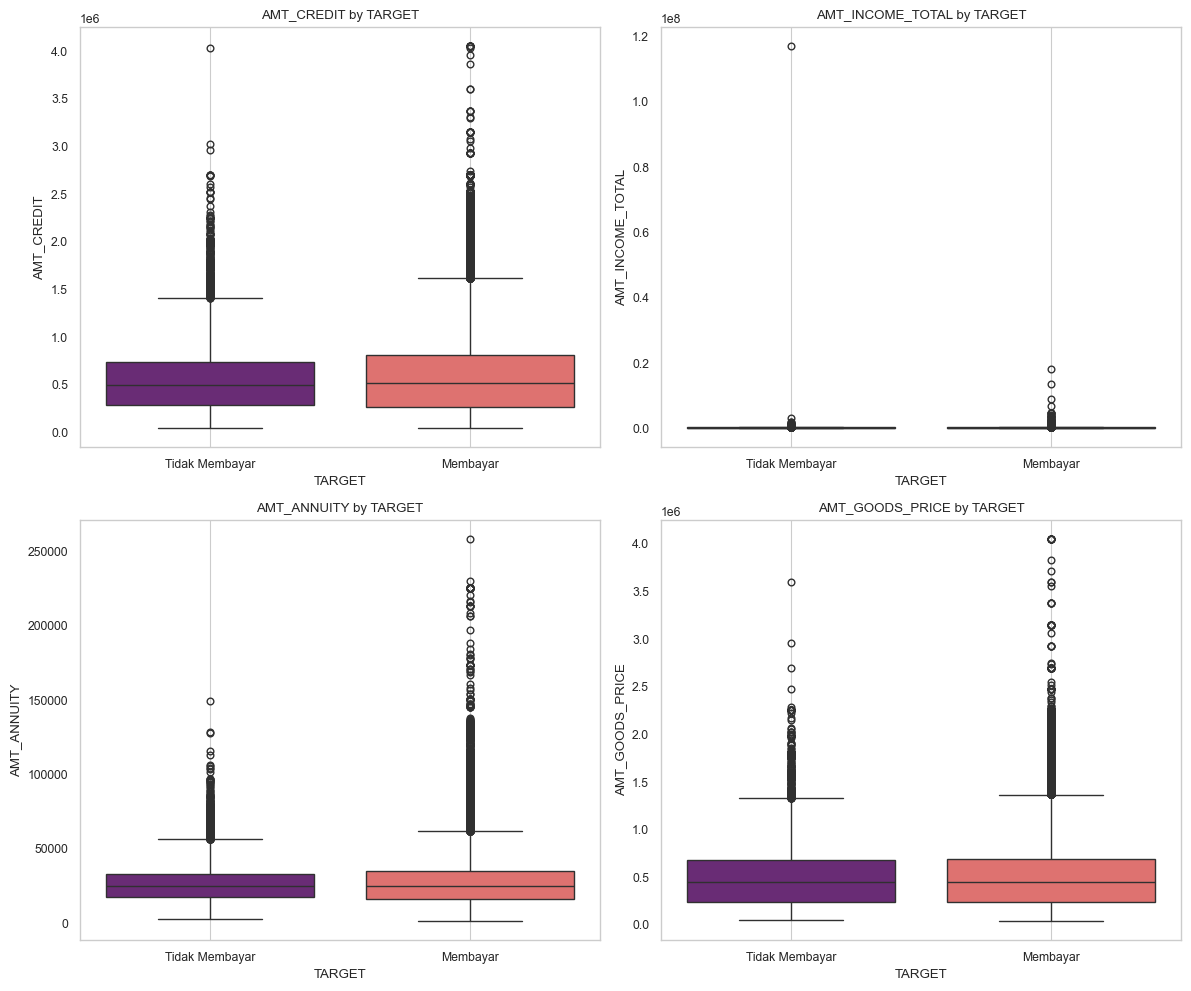

In [40]:
nums = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']  # Tambahkan kolom lain jika diperlukan

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Membuat boxplot untuk setiap kolom numerik dalam subplot
target_mapping = {0: 'Membayar', 1: 'Tidak Membayar'}

# Membuat boxplot untuk setiap kolom numerik dalam subplot
for i, column in enumerate(nums):
    sns.boxplot(x='TARGET', y=column, data=df_t.replace({'TARGET': target_mapping}), palette='magma', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'{column} by TARGET')
    ax[i // 2][i % 2].grid()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [41]:
# Age Vs Target
no_age = df_t[df_t['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = df_t[df_t['TARGET']==1]['DAYS_BIRTH'].values/-365

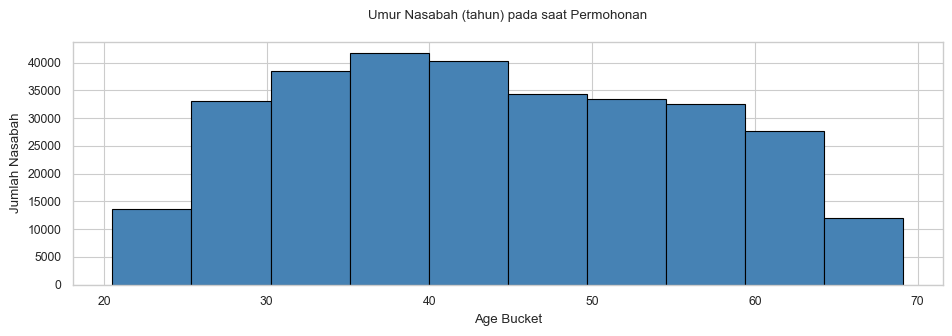

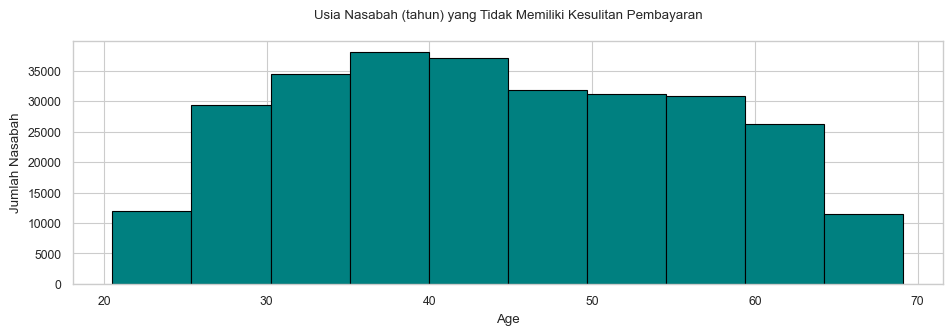

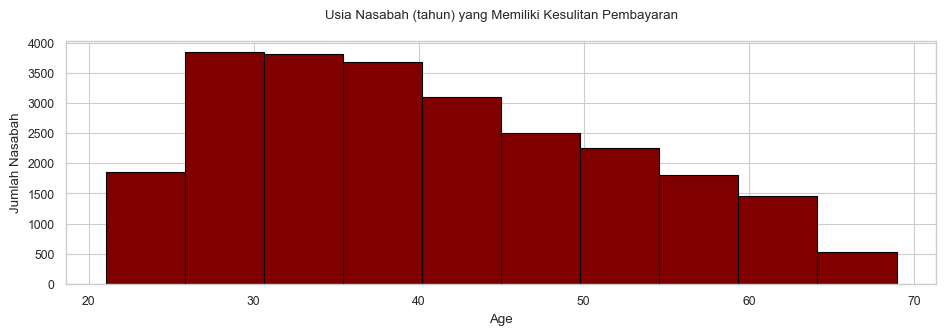

In [42]:
import matplotlib.pyplot as plt

# Kolom-kolom yang akan digunakan dalam plot
columns = ['DAYS_BIRTH', 'DAYS_BIRTH', 'DAYS_BIRTH']
colors = ['steelblue', 'teal', 'maroon']
titles = [
    'Umur Nasabah (tahun) pada saat Permohonan',
    'Usia Nasabah (tahun) yang Tidak Memiliki Kesulitan Pembayaran',
    'Usia Nasabah (tahun) yang Memiliki Kesulitan Pembayaran'
]

data = [df_t['DAYS_BIRTH'].values / -365, no_age, yes_age]

# Membuat plot menggunakan loop
for i in range(3):
    plt.figure(figsize=(10, 3))
    plt.hist(data[i], bins=10, edgecolor='black', color=colors[i])
    plt.title(f'{titles[i]}\n')
    plt.xlabel('Age' if i != 0 else 'Age Bucket')
    plt.ylabel('Jumlah Nasabah')
    plt.show()


## Multivariate Analysis

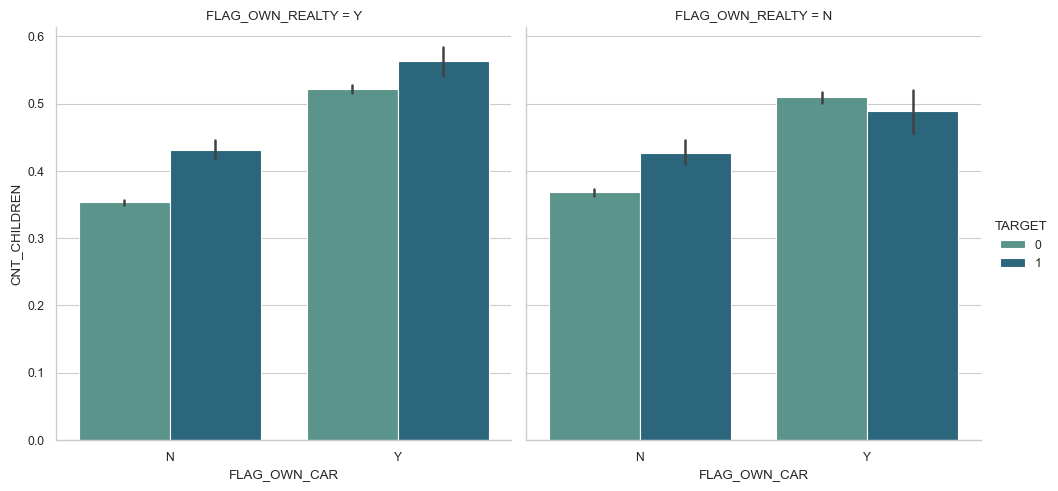

In [43]:
# Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status
sns.catplot(
    x='FLAG_OWN_CAR',
    y='CNT_CHILDREN',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='crest',  # Sesuaikan palet warna sesuai kebutuhan
    data=df_t
)

# Menampilkan plot
plt.show()

Nasabah yang memiliki mobil dan rumah/apartemen mengalami kesulitan dalam membayar pinjamannya karena mempunyai anak yang lebih banyak dibandingkan nasabah yang tidak memiliki rumah/apartemen.

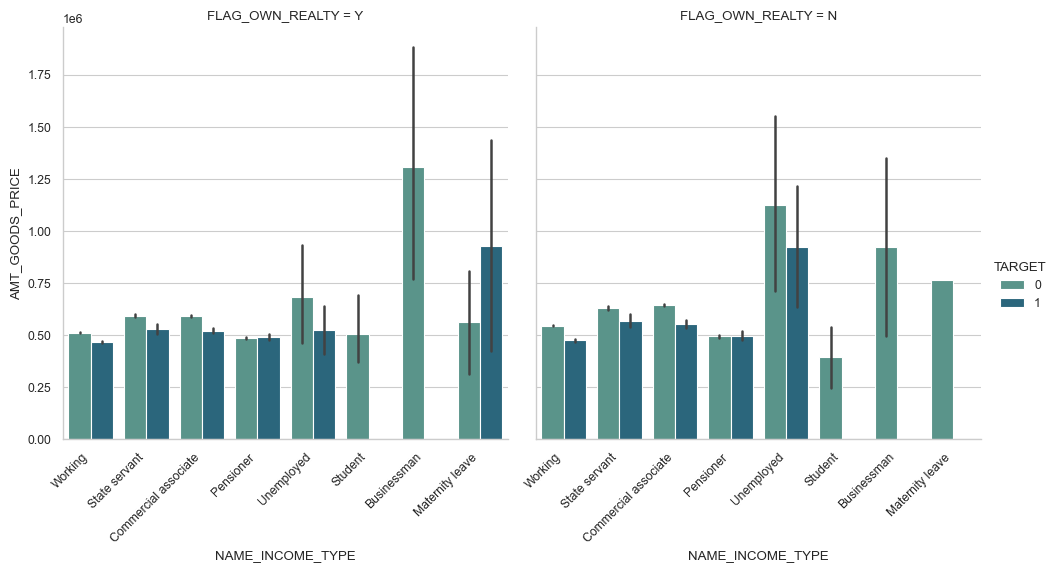

In [44]:
# Plot dengan sns.catplot
fig = sns.catplot(
    x='NAME_INCOME_TYPE',
    y='AMT_GOODS_PRICE',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='crest',
    data=df_t
)

# Mengatur rotasi label sumbu x agar lebih mudah dibaca
fig.set_xticklabels(rotation=45, horizontalalignment='right')

# Menampilkan plot
plt.show()

Nasabah dengan tipe pendapatan cuti melahirkan FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/apartemen) mengalami kesulitan dalam membayar pinjamannya dibandingkan dengan nasabah dengan tipe pendapatan FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/apartemen).

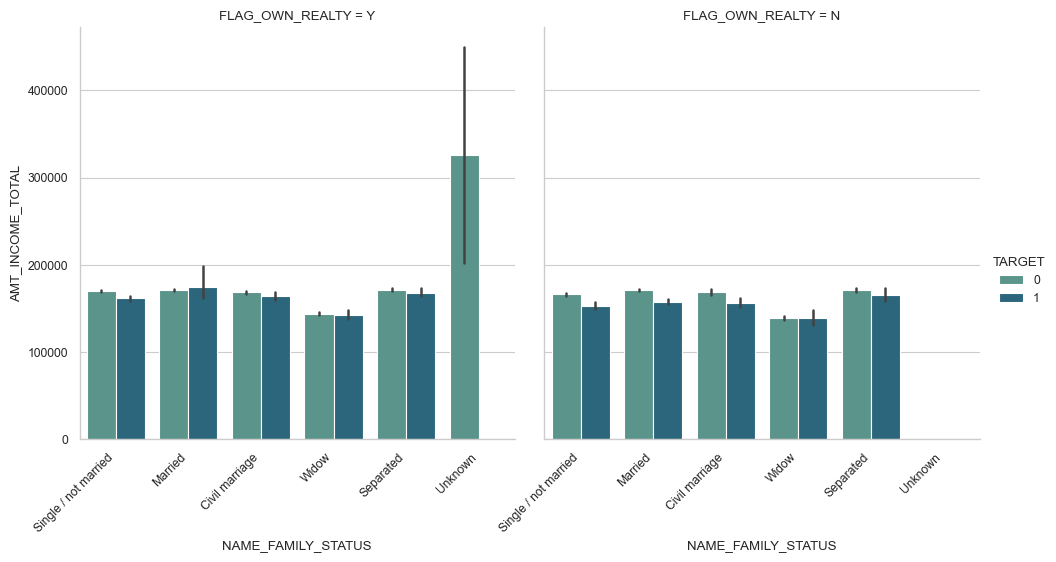

In [45]:
# Family Status, Amount of Income, Target, and House/Flat Ownership Status
fig = sns.catplot(
            x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', 
            palette = 'crest',
            data = df_t)

# Mengatur rotasi label sumbu x agar lebih mudah dibaca
fig.set_xticklabels(rotation=45, horizontalalignment='right')
# Menampilkan plot
plt.show()

Nasabah yang sudah menikah dan memiliki rumah/apartemen (FLAG_MILIK_RUMAH = ya) mengalami kesulitan dalam membayar pinjaman berpendapatan sedang dibandingkan dengan nasabah yang tidak memiliki rumah/apartemen (FLAG_MILIK_APARTEMEN = tidak).

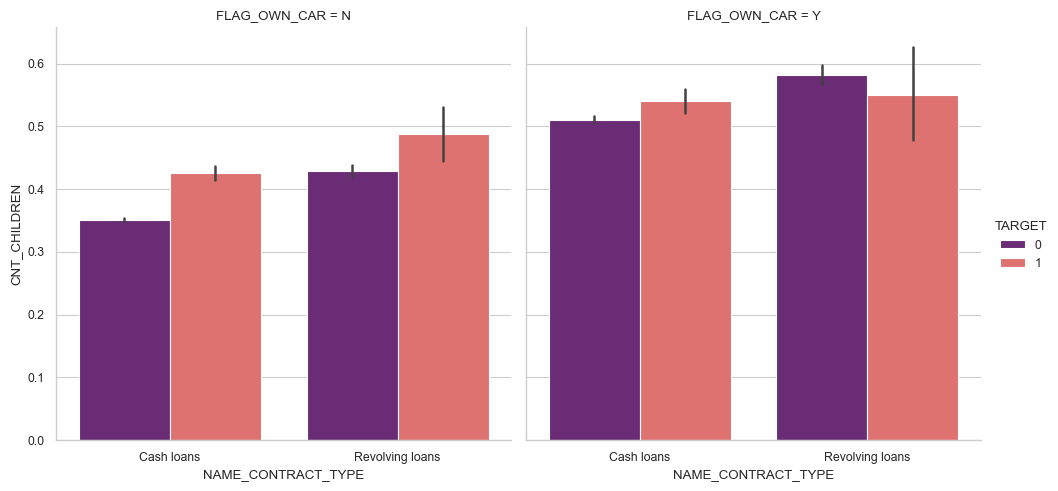

In [46]:
# Contract Type, The Number of Children, Target, and Car Ownership Status
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'magma',
            data = df_t)
plt.show()

Untuk pinjaman bergulir dengan syarat FLAG_OWN_A CAR = Tidak (tidak ada mobil), lebih sulit melunasi pinjaman dibandingkan dengan syarat FLAG_OWN_MOBIL = Ya (memiliki mobil).

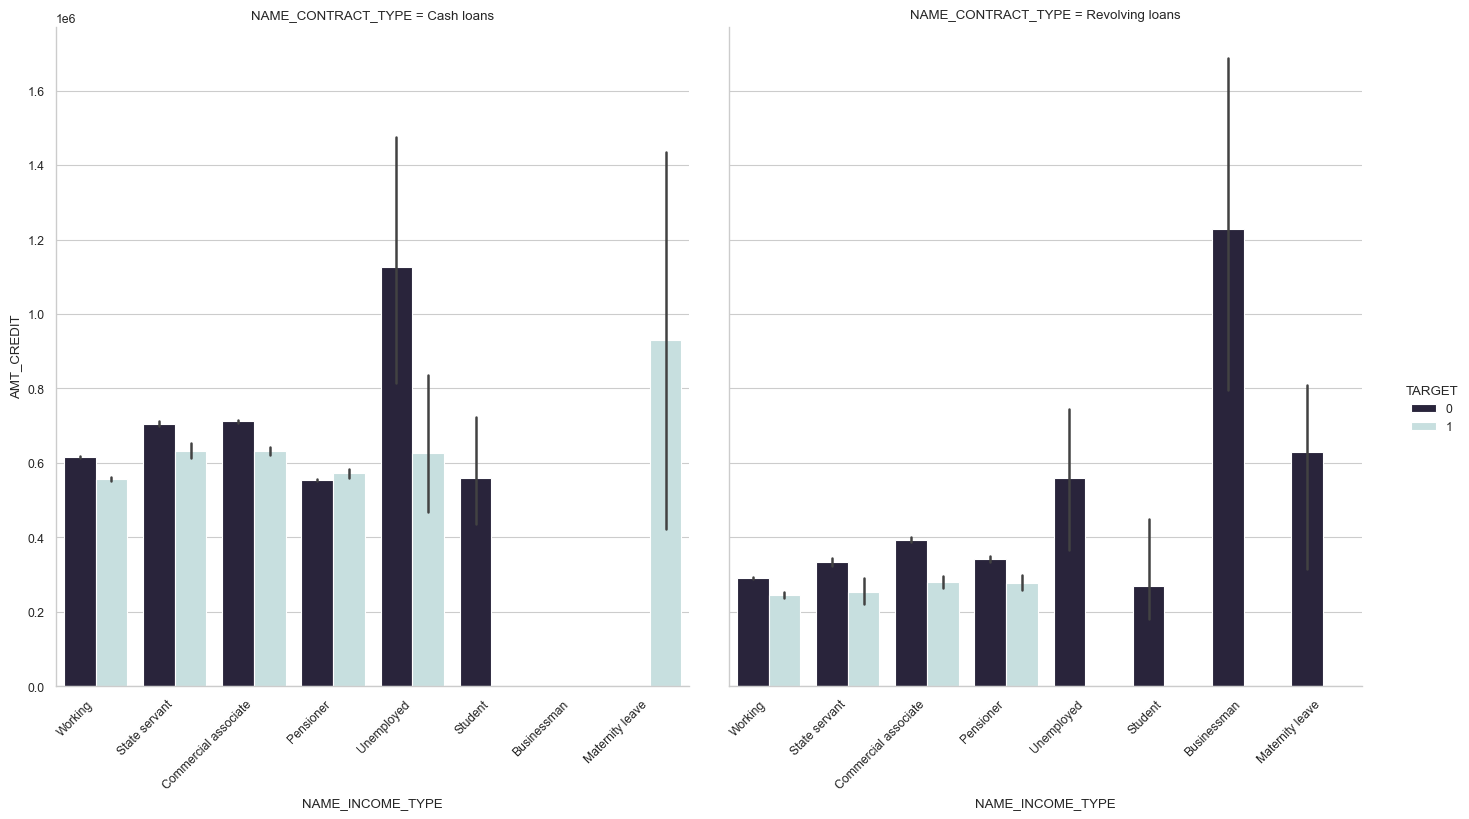

In [47]:
# Income Type, Amount of Credit, Target, and Contract Type
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df_t)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Untuk pendapatan bersalin dengan pinjaman tunai seperti ini, semua nasabah akan kesulitan membayar pinjaman dengan batas kredit menengah. Pada saat yang sama, seluruh nasabah yang sedang cuti hamil dan pinjaman bergulir tidak mengalami kesulitan dalam membayar kembali pinjamannya.

Pada nasabah pengangguran yang memiliki pinjaman tunai, lebih dari 50% mengalami kendala pada pinjaman dengan batas kredit menengah. Sementara itu, seluruh nasabah pengangguran yang memiliki pinjaman bergulir tidak mengalami kesulitan dalam membayar kembali pinjamannya.

Semua nasabah pelajar dapat dengan mudah melunasi pinjamannya melalui pinjaman tunai atau pinjaman bergulir dengan batas kredit rendah hingga menengah.

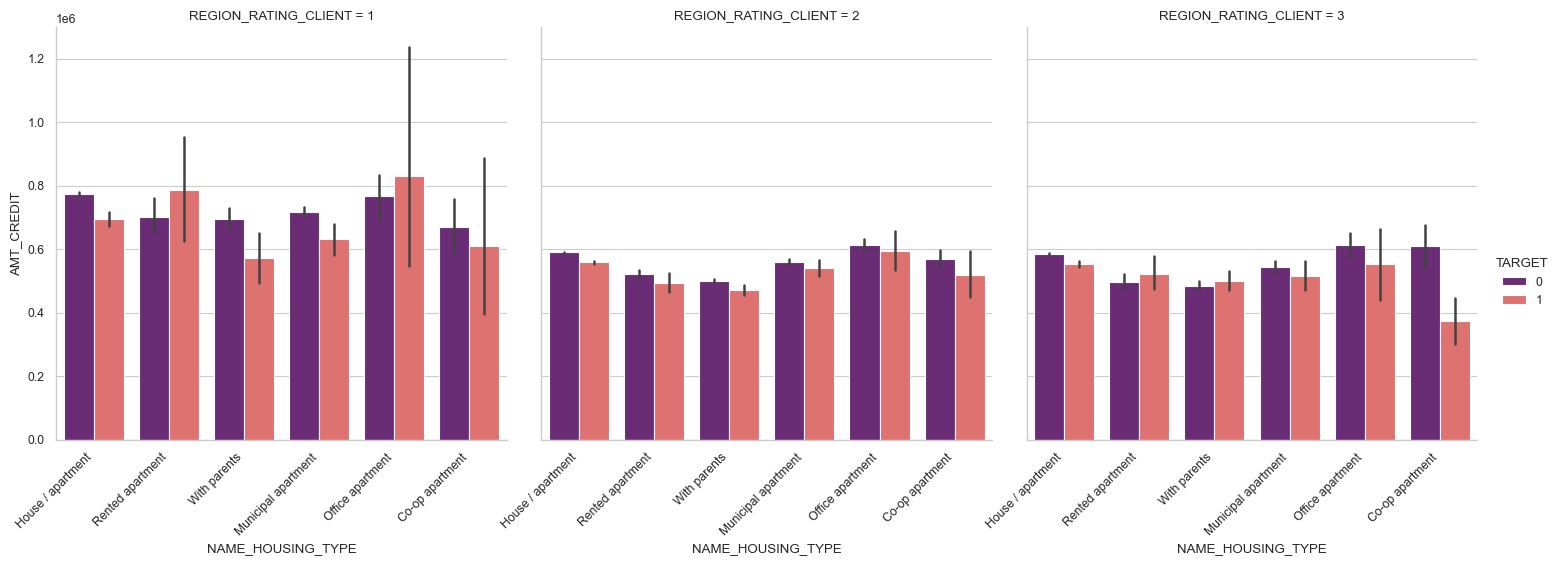

In [48]:
# Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'magma',
            data = df_t)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang tinggal di apartemen sewa atau perkantoran di wilayah dengan peringkat 1 lebih sulit membayar kembali pinjaman dengan jumlah pinjaman sedang dibandingkan dengan nasabah di wilayah dengan peringkat 2.

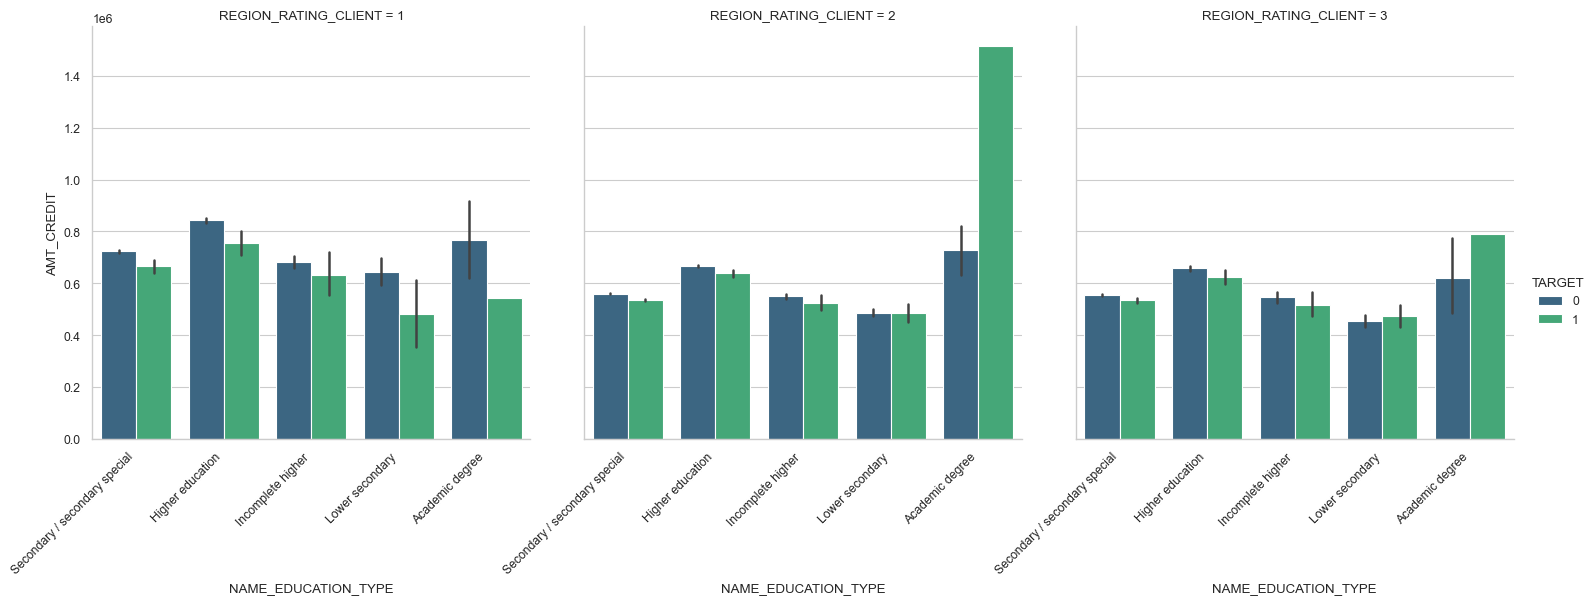

In [49]:
# Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'viridis',
            data = df_t)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk nasabah yang memiliki gelar akademis dan tinggal di wilayah dengan peringkat 2, mereka memiliki masalah dalam membayar pinjaman untuk jumlah pinjaman yang lebih tinggi. Dan, nasabah dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk jumlah pinjaman menengah.

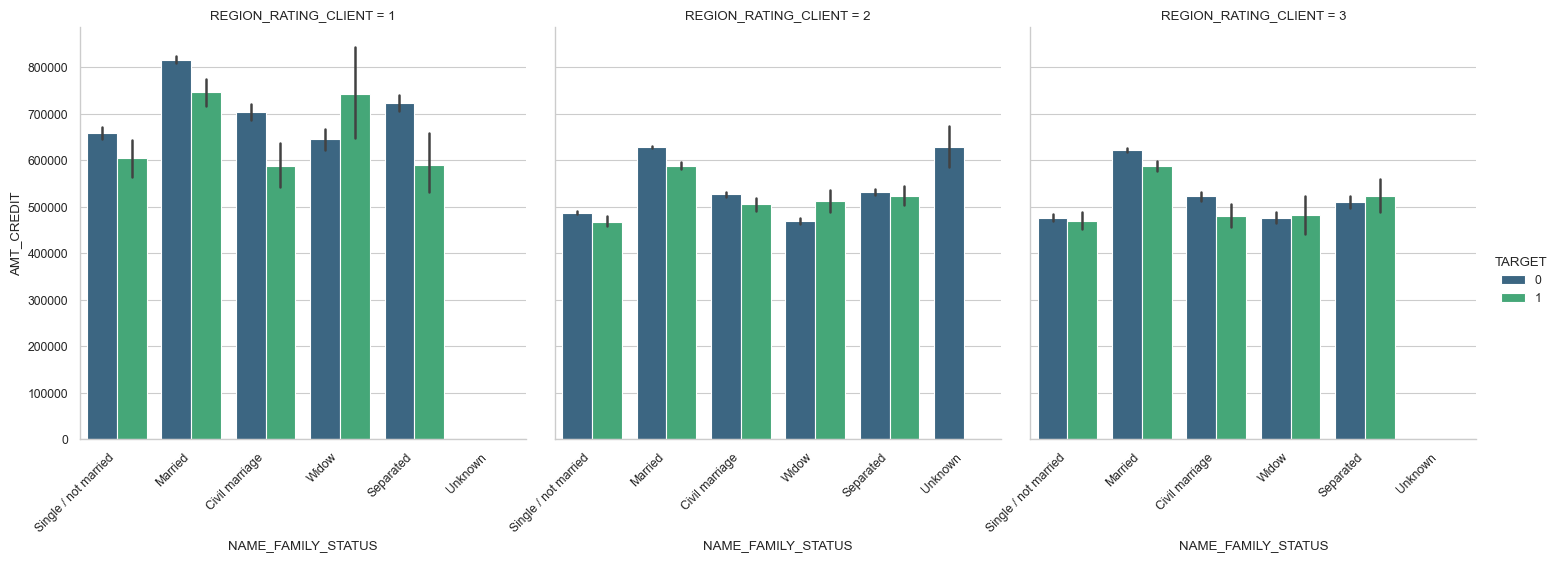

In [50]:
# Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'viridis',
            data = df_t)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang berstatus janda/duda, baik yang tinggal di wilayah rating 1, 2, atau 3, memiliki masalah dalam membayar pinjaman untuk jumlah pinjaman sedang hingga tinggi.

Nasabah yang berstatus janda/duda, dan tinggal di daerah peringkat 3, memiliki lebih banyak masalah dalam membayar pinjaman untuk jumlah pinjaman sedang dibandingkan dengan nasabah yang tinggal di daerah peringkat 1 atau 2.

## Data Cleaning

## Handling Missing values

In [51]:
# Check for empty elements
missing_values_check = df_t.isnull().values.any()
print('Missing values status:', missing_values_check)

# Membuat DataFrame untuk total nilai null dan persentasenya
null_values_count = pd.DataFrame(df_t.isnull().sum(), columns=['Total Null Values'])
null_values_count['Percentage'] = (null_values_count['Total Null Values'] / df_t.shape[0]) * 100

# Mengurutkan berdasarkan persentase null values secara descending
null_values_count_sorted = null_values_count.sort_values(by='Percentage', ascending=False).reset_index()
null_values_count_sorted

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...
117,NAME_HOUSING_TYPE,0,0.000000
118,NAME_FAMILY_STATUS,0,0.000000
119,NAME_EDUCATION_TYPE,0,0.000000
120,NAME_INCOME_TYPE,0,0.000000


In [52]:
# Menentukan ambang batas persentase untuk menentukan fitur yang akan dihapus
threshold_percentage = 50

# Menghitung persentase null values untuk setiap kolom
null_percentage = df_t.isnull().mean() * 100

# Menentukan kolom yang akan dihapus berdasarkan threshold persentase
columns_to_drop = null_percentage[null_percentage >= threshold_percentage].index.tolist()

# Menyertakan kolom-kolom tambahan yang ingin dihapus secara spesifik
additional_columns_to_drop = ['OWN_CAR_AGE', 'EXT_SOURCE_1']

# Menggabungkan kedua list kolom yang akan dihapus
columns_to_drop.extend(additional_columns_to_drop)

# Menghapus kolom-kolom yang telah ditentukan
df_t.drop(columns=columns_to_drop, inplace=True)

In [53]:
# Check for missing values after dropping some features
missing_values_status = df_t.isnull().values.any()
print('Missing values status:', missing_values_status)

# Membuat DataFrame untuk total nilai null dan persentasenya setelah penghapusan fitur
null_values_count = df_t.isnull().sum().sort_values()
null_values_df = pd.DataFrame(null_values_count, columns=['Total Null Values'])
null_values_df['Percentage'] = (null_values_df['Total Null Values'] / df_t.shape[0]) * 100

# Mengurutkan berdasarkan persentase null values secara descending
null_values_df_sorted = null_values_df.sort_values(by='Percentage', ascending=False).reset_index()
null_values_df_sorted

Missing values status: True


,index,Total Null Values,Percentage
0,FLOORSMAX_AVG,153020,49.760822
1,FLOORSMAX_MEDI,153020,49.760822
2,FLOORSMAX_MODE,153020,49.760822
3,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
4,YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
...,...,...,...
76,REGION_RATING_CLIENT_W_CITY,0,0.000000
77,FLAG_DOCUMENT_3,0,0.000000
78,FLAG_DOCUMENT_2,0,0.000000
79,FLAG_DOCUMENT_6,0,0.000000


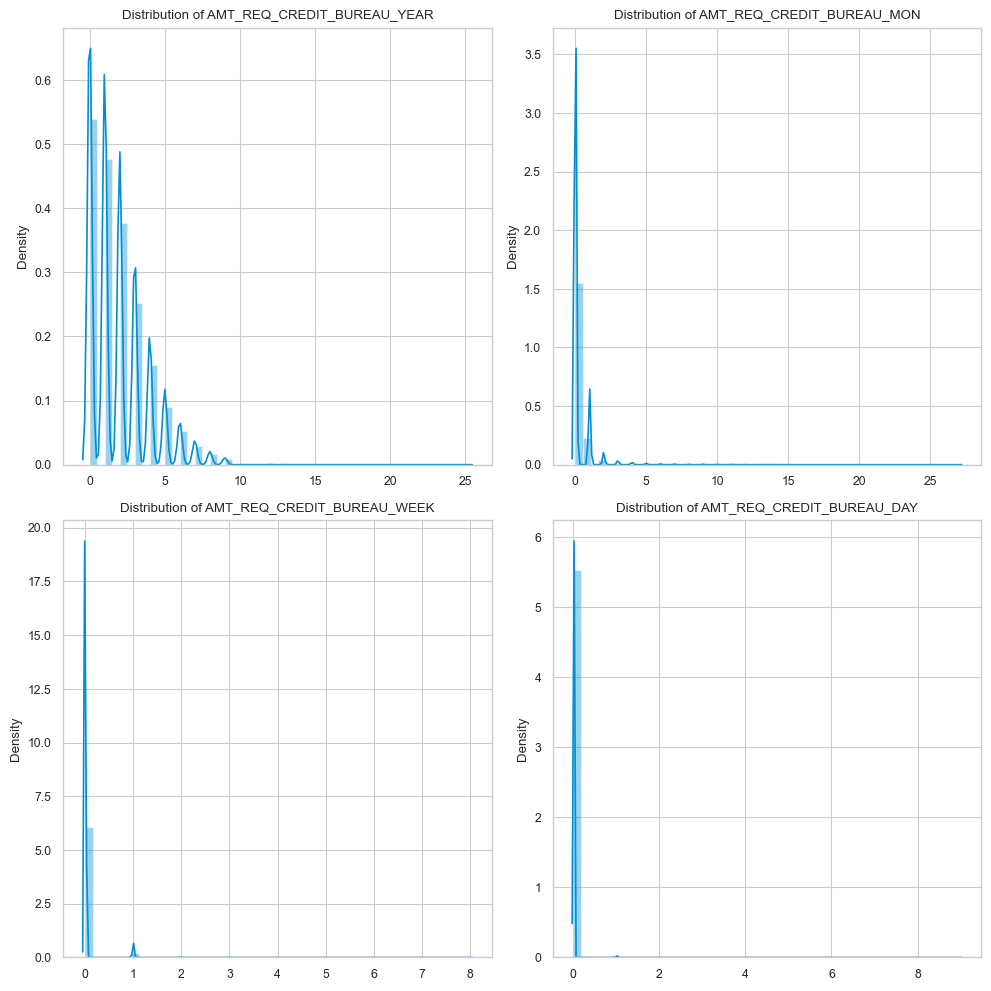

In [54]:
columns_with_null = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]

# Menetapkan style dan context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Membuat subplot dengan loop untuk setiap kolom numerik
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, column in enumerate(columns_with_null):
    sns.distplot(df_t[column], ax=ax[i // 2][i % 2], kde=True)
    ax[i // 2][i % 2].set_title(f'Distribution of {column}')
    ax[i // 2][i % 2].set_xlabel('')
    ax[i // 2][i % 2].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()

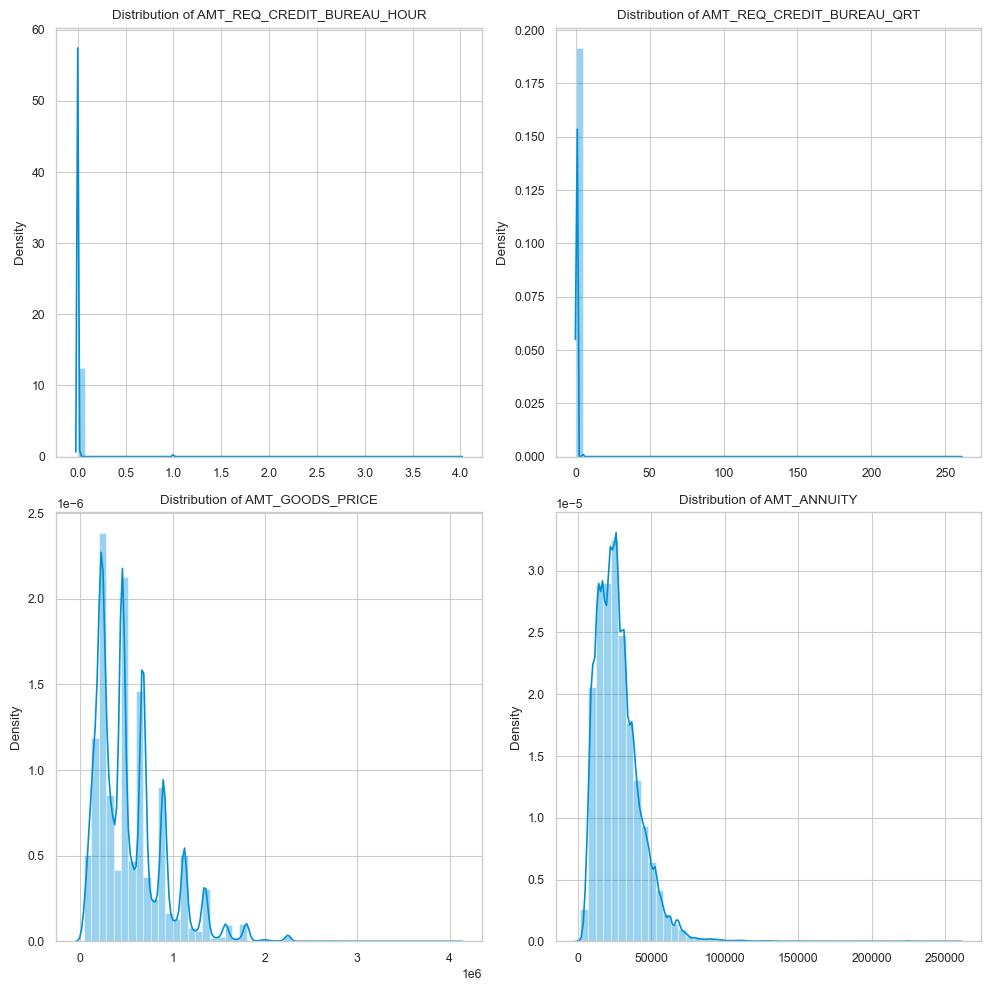

In [55]:
columns_with_null = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY'
]

# Menetapkan style dan context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Membuat subplot dengan loop untuk setiap kolom numerik
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, column in enumerate(columns_with_null):
    sns.distplot(df_t[column], ax=ax[i // 2][i % 2], kde=True)
    ax[i // 2][i % 2].set_title(f'Distribution of {column}')
    ax[i // 2][i % 2].set_xlabel('')
    ax[i // 2][i % 2].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()

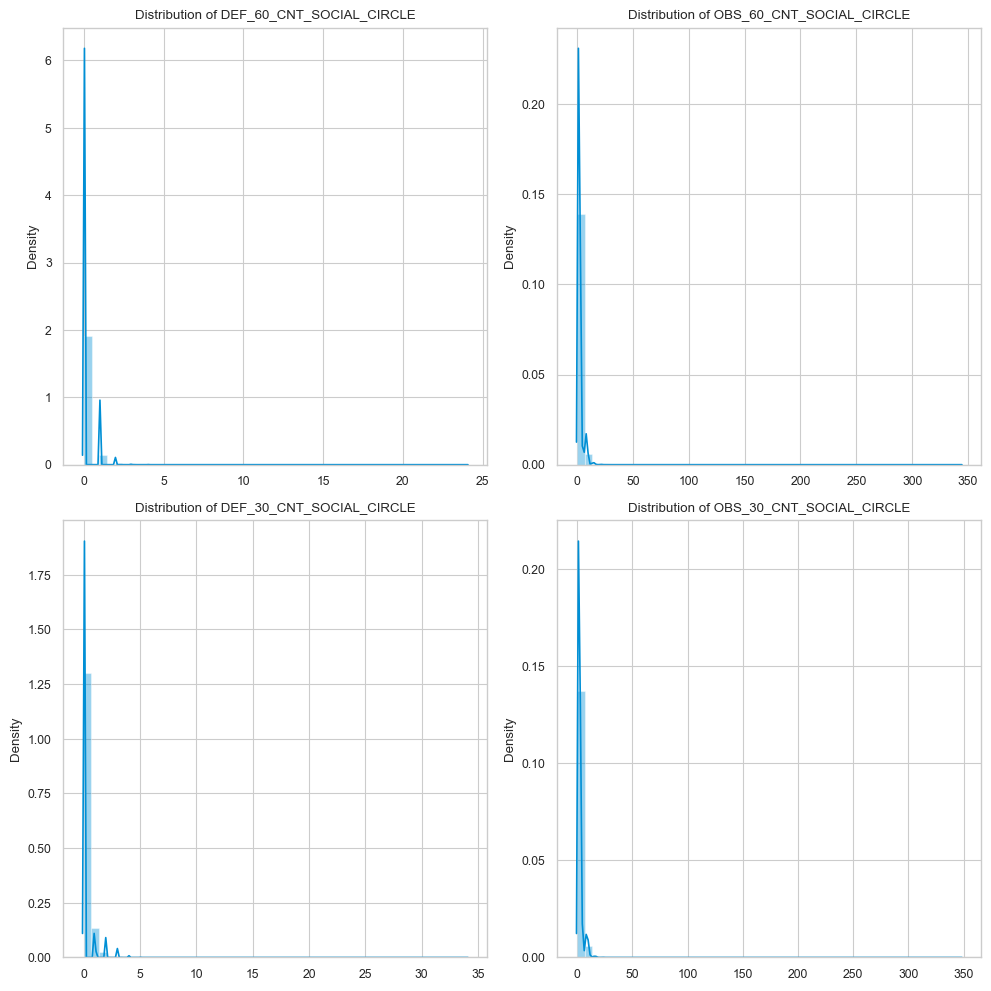

In [56]:
columns_with_null = [
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE'
]

# Menetapkan style dan context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Membuat subplot dengan loop untuk setiap kolom numerik
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, column in enumerate(columns_with_null):
    sns.distplot(df_t[column], ax=ax[i // 2][i % 2], kde=True)
    ax[i // 2][i % 2].set_title(f'Distribution of {column}')
    ax[i // 2][i % 2].set_xlabel('')
    ax[i // 2][i % 2].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()

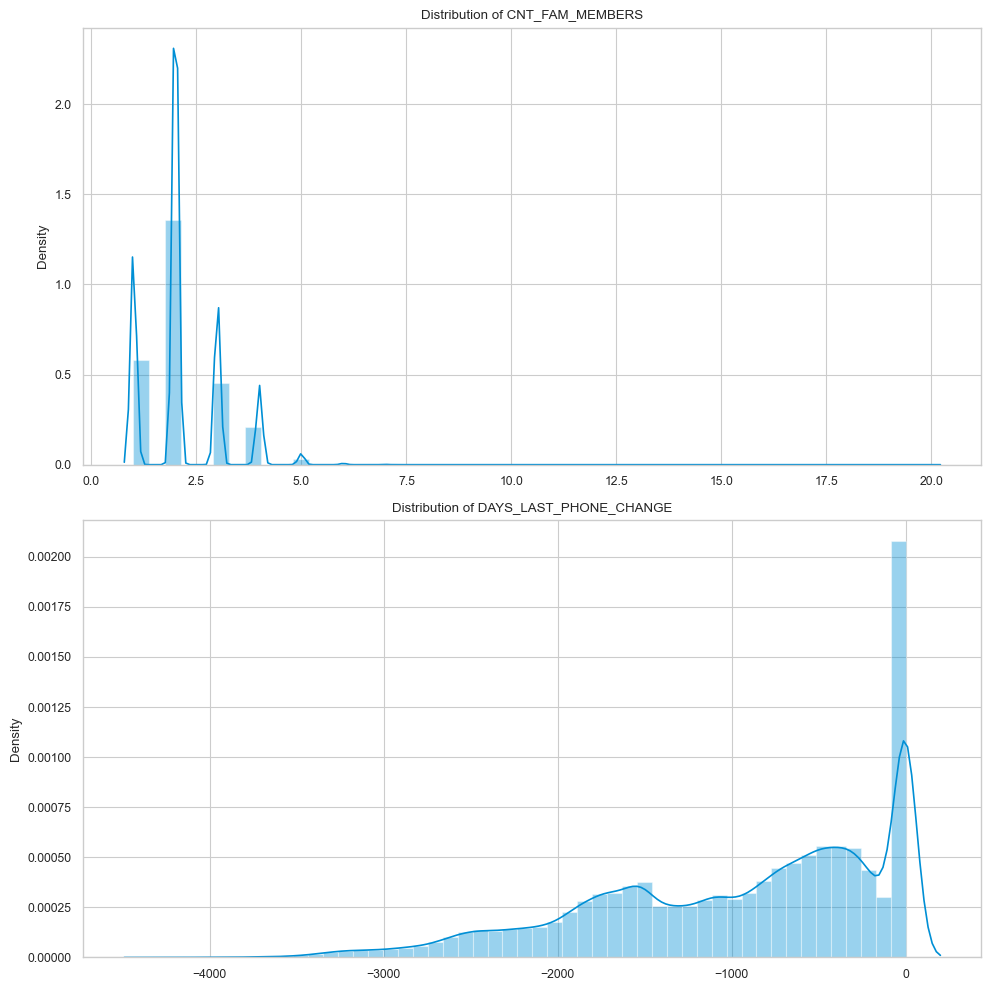

In [57]:
# Kolom-kolom numerik yang ingin divisualisasikan
columns_with_null = ['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

# Menetapkan style dan context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Membuat subplot dengan loop untuk setiap kolom numerik
fig, ax = plt.subplots(len(columns_with_null), figsize=(10, 10))
for i, column in enumerate(columns_with_null):
    sns.distplot(df_t[column], ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dapat dilihat distribusi fitur numerik yang disebutkan di atas skewed, sehingga nilai yang hilang pada fitur-fitur tersebut akan diperhitungkan oleh median

In [58]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

cats_col = df_t.select_dtypes(include=['object']).columns.tolist()
nums_col = df_t.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_t:
    if df_t[column].isnull().any():
        if(column in cats_col):
            df_t[column]=df_t[column].fillna(df_t[column].mode()[0])
        else:
            df_t[column]=df_t[column].fillna(df_t[column].median())

In [59]:
# Check for missing values after imputation
missing_values_status = df_t.isnull().values.any()
print('Missing values status:', missing_values_status)

# Membuat DataFrame untuk total nilai null dan persentasenya setelah imputasi
null_values_count = df_t.isnull().sum().sort_values()
null_values_df = pd.DataFrame(null_values_count, columns=['Total Null Values'])
null_values_df['Percentage'] = (null_values_df['Total Null Values'] / df_t.shape[0]) * 100

# Mengurutkan berdasarkan persentase null values secara descending
null_values_df_sorted = null_values_df.sort_values(by='Percentage', ascending=False).reset_index()

# Menampilkan informasi
null_values_df_sorted

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,LIVE_CITY_NOT_WORK_CITY,0,0.0
2,DAYS_EMPLOYED,0,0.0
3,AMT_CREDIT,0,0.0
4,TARGET,0,0.0
...,...,...,...
76,FLAG_DOCUMENT_20,0,0.0
77,FLAG_DOCUMENT_21,0,0.0
78,AMT_REQ_CREDIT_BUREAU_HOUR,0,0.0
79,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0


## Duplikasi data

In [60]:
df_t.duplicated().sum()

0

## Outliers

In [61]:
num_features = df_t[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

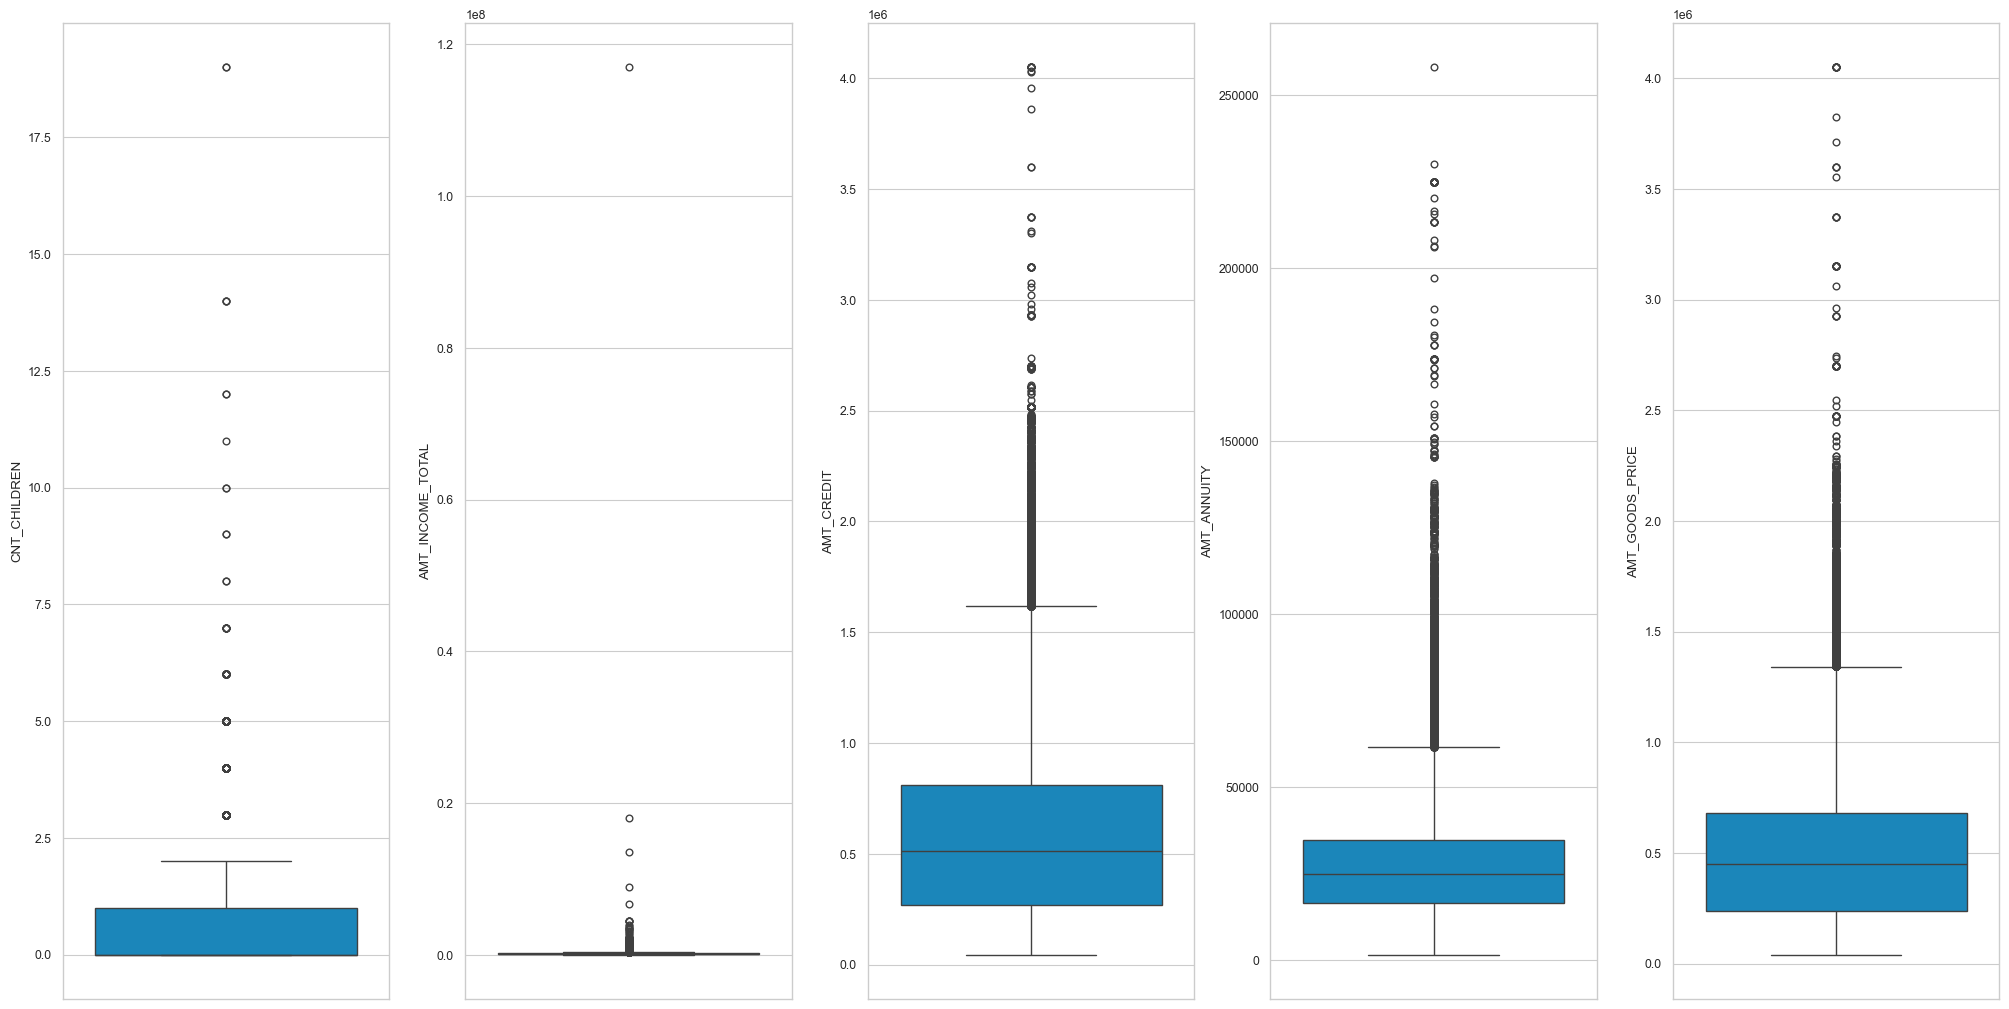

In [62]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

for index, (feature, values) in enumerate(num_features.items()):
    if index < 5:
        sns.boxplot(y=feature, data=num_features, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Machine Learning

In [63]:
# dataset that only consist numerical features pt.2
num_features = df_t[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

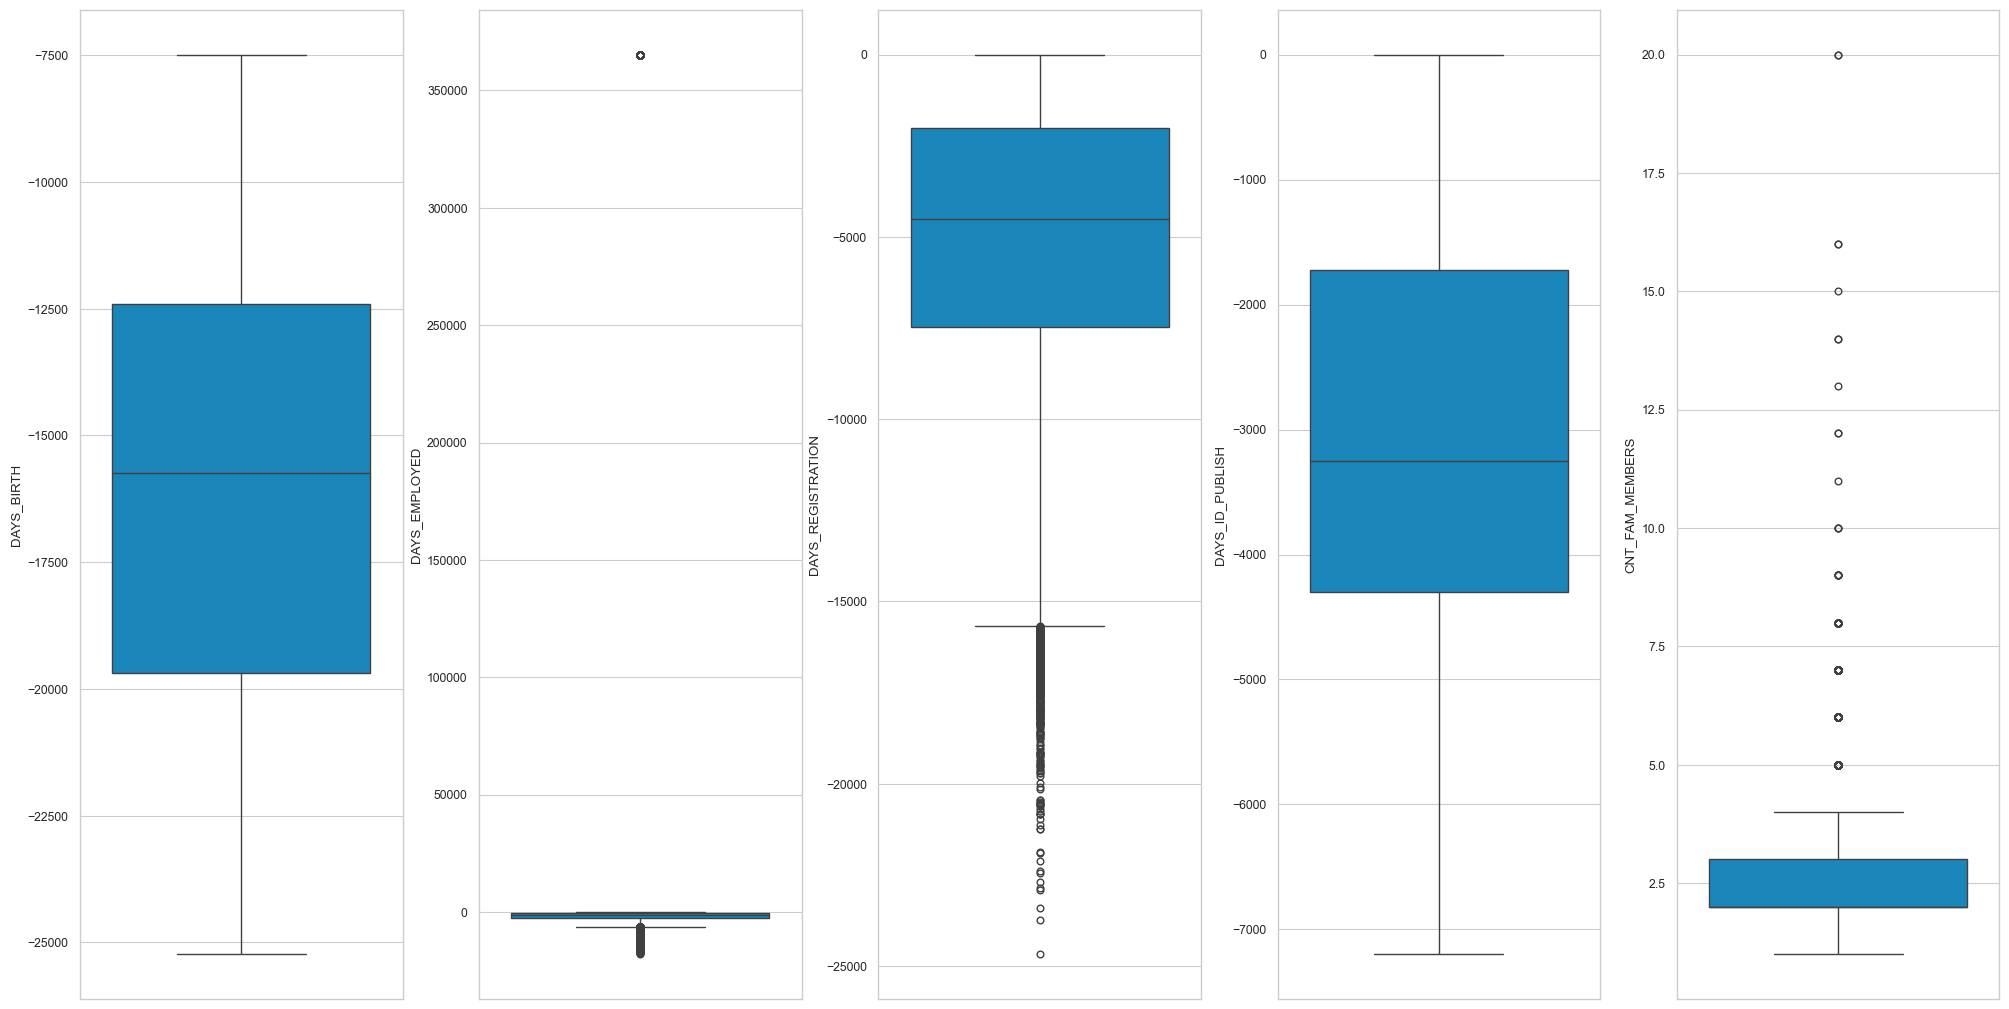

In [64]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

for index, (feature, values) in enumerate(num_features.items()):
    if index < 5:
        sns.boxplot(y=feature, data=num_features, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [65]:
# dataset that only consist numerical features pt.3
num_features = df_t[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

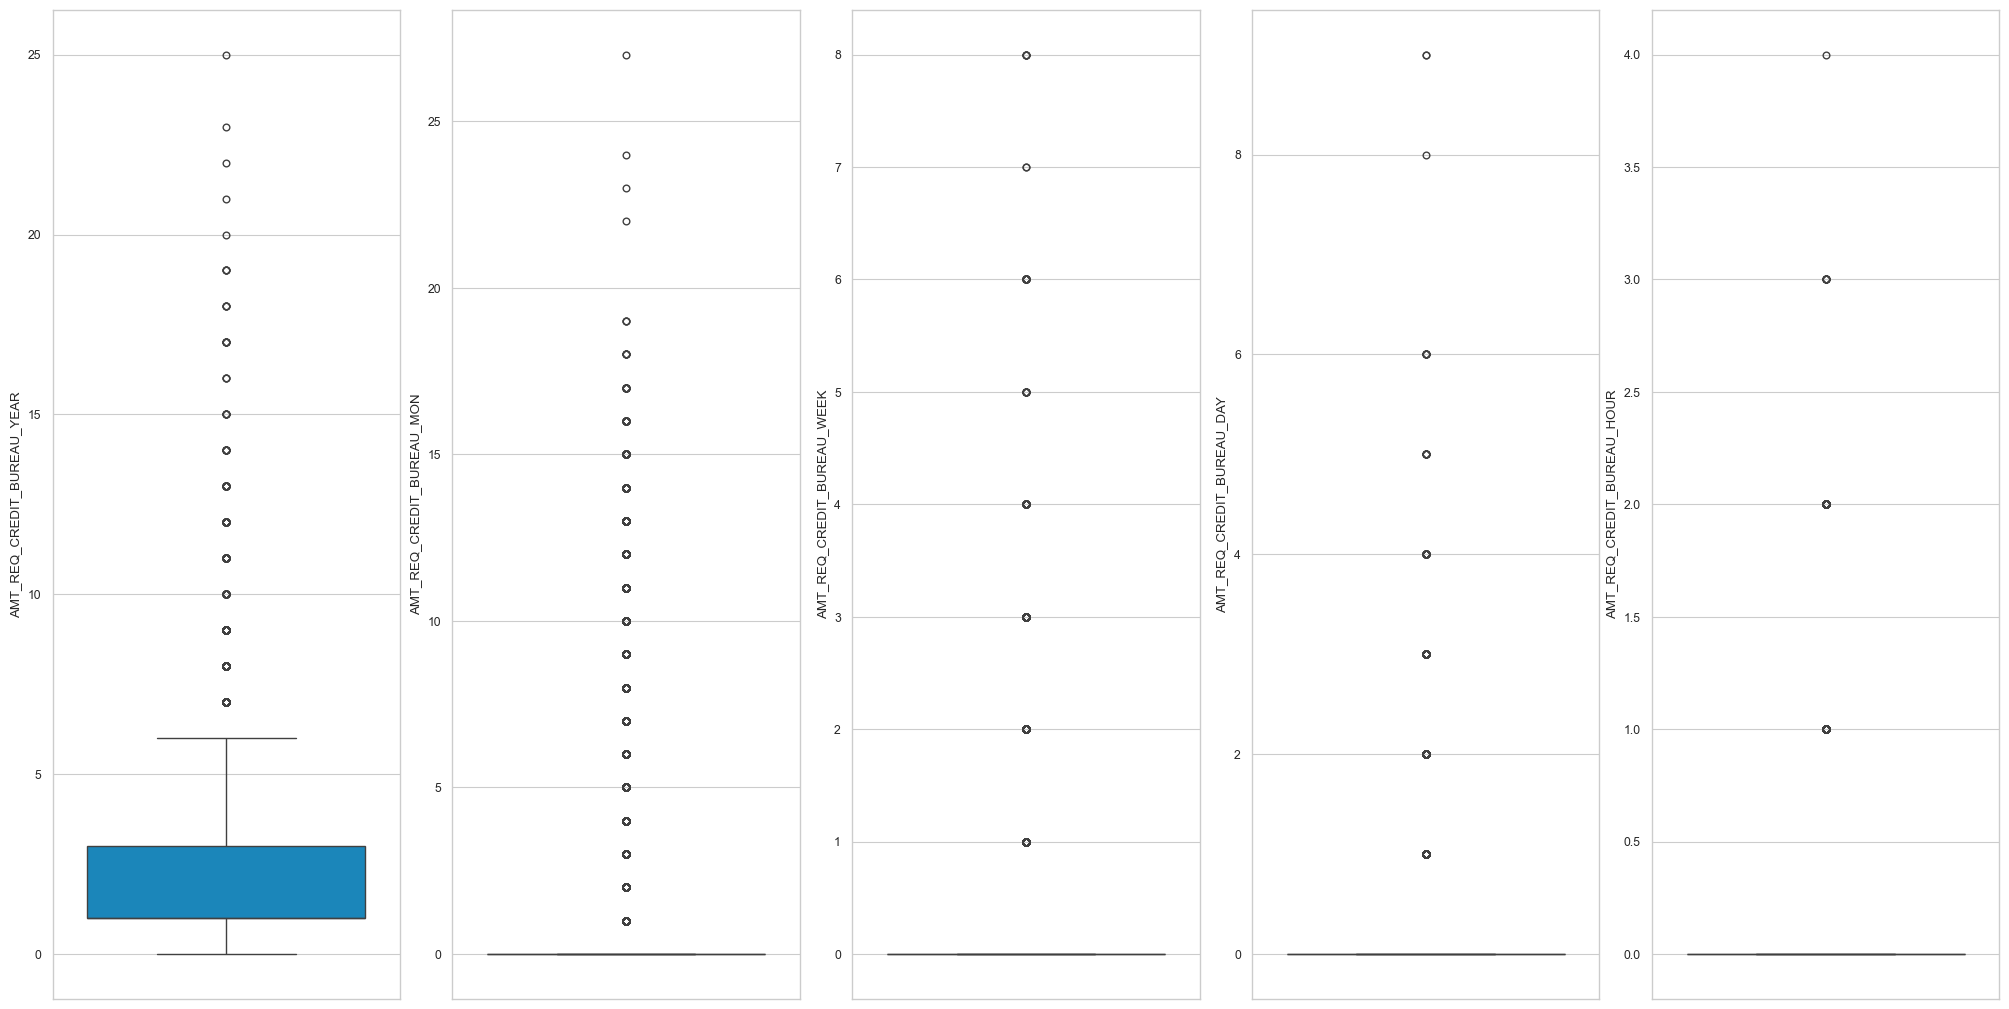

In [66]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

for index, (feature, values) in enumerate(num_features.items()):
    if index < 5:
        sns.boxplot(y=feature, data=num_features, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [67]:
# dataset that only consist numerical features pt.4
num_features = df_t[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

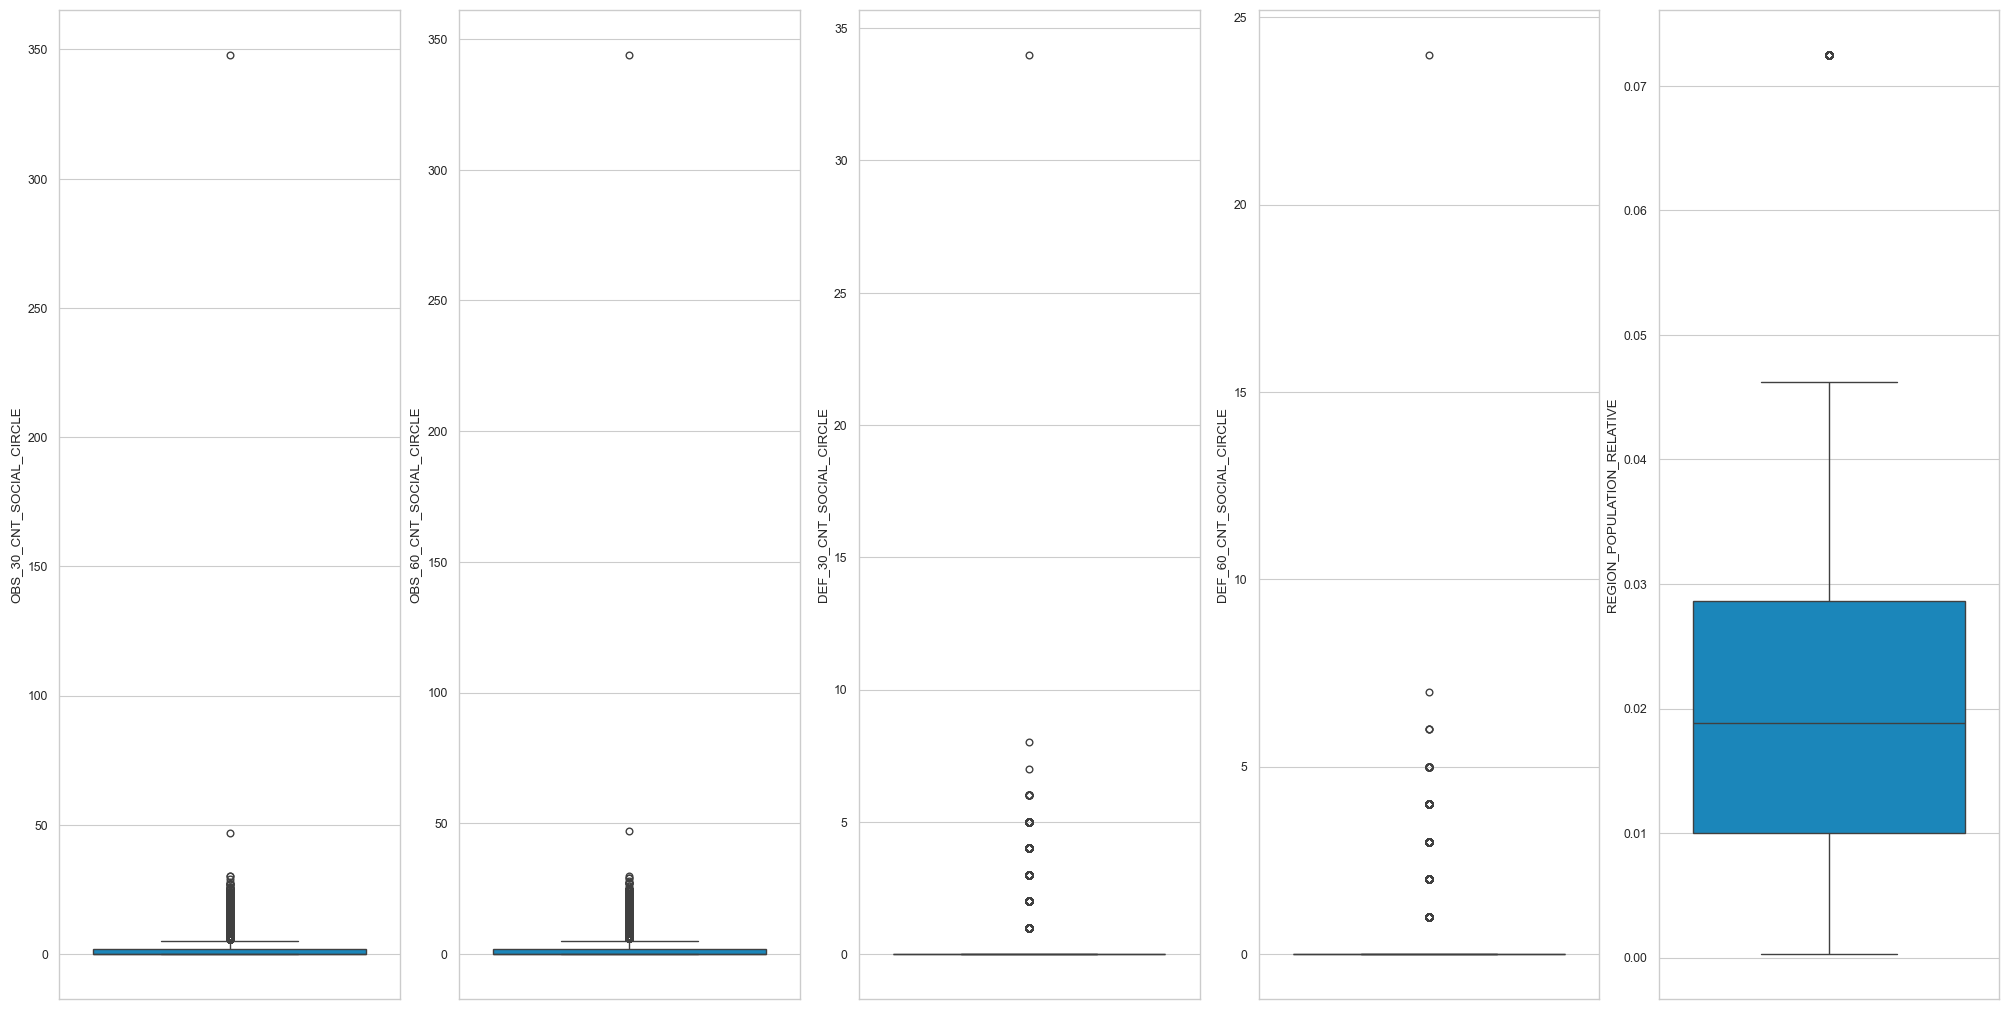

In [68]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

for index, (feature, values) in enumerate(num_features.items()):
    if index < 5:
        sns.boxplot(y=feature, data=num_features, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [69]:
# dataset that only consist numerical features pt.5
num_features = df_t[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

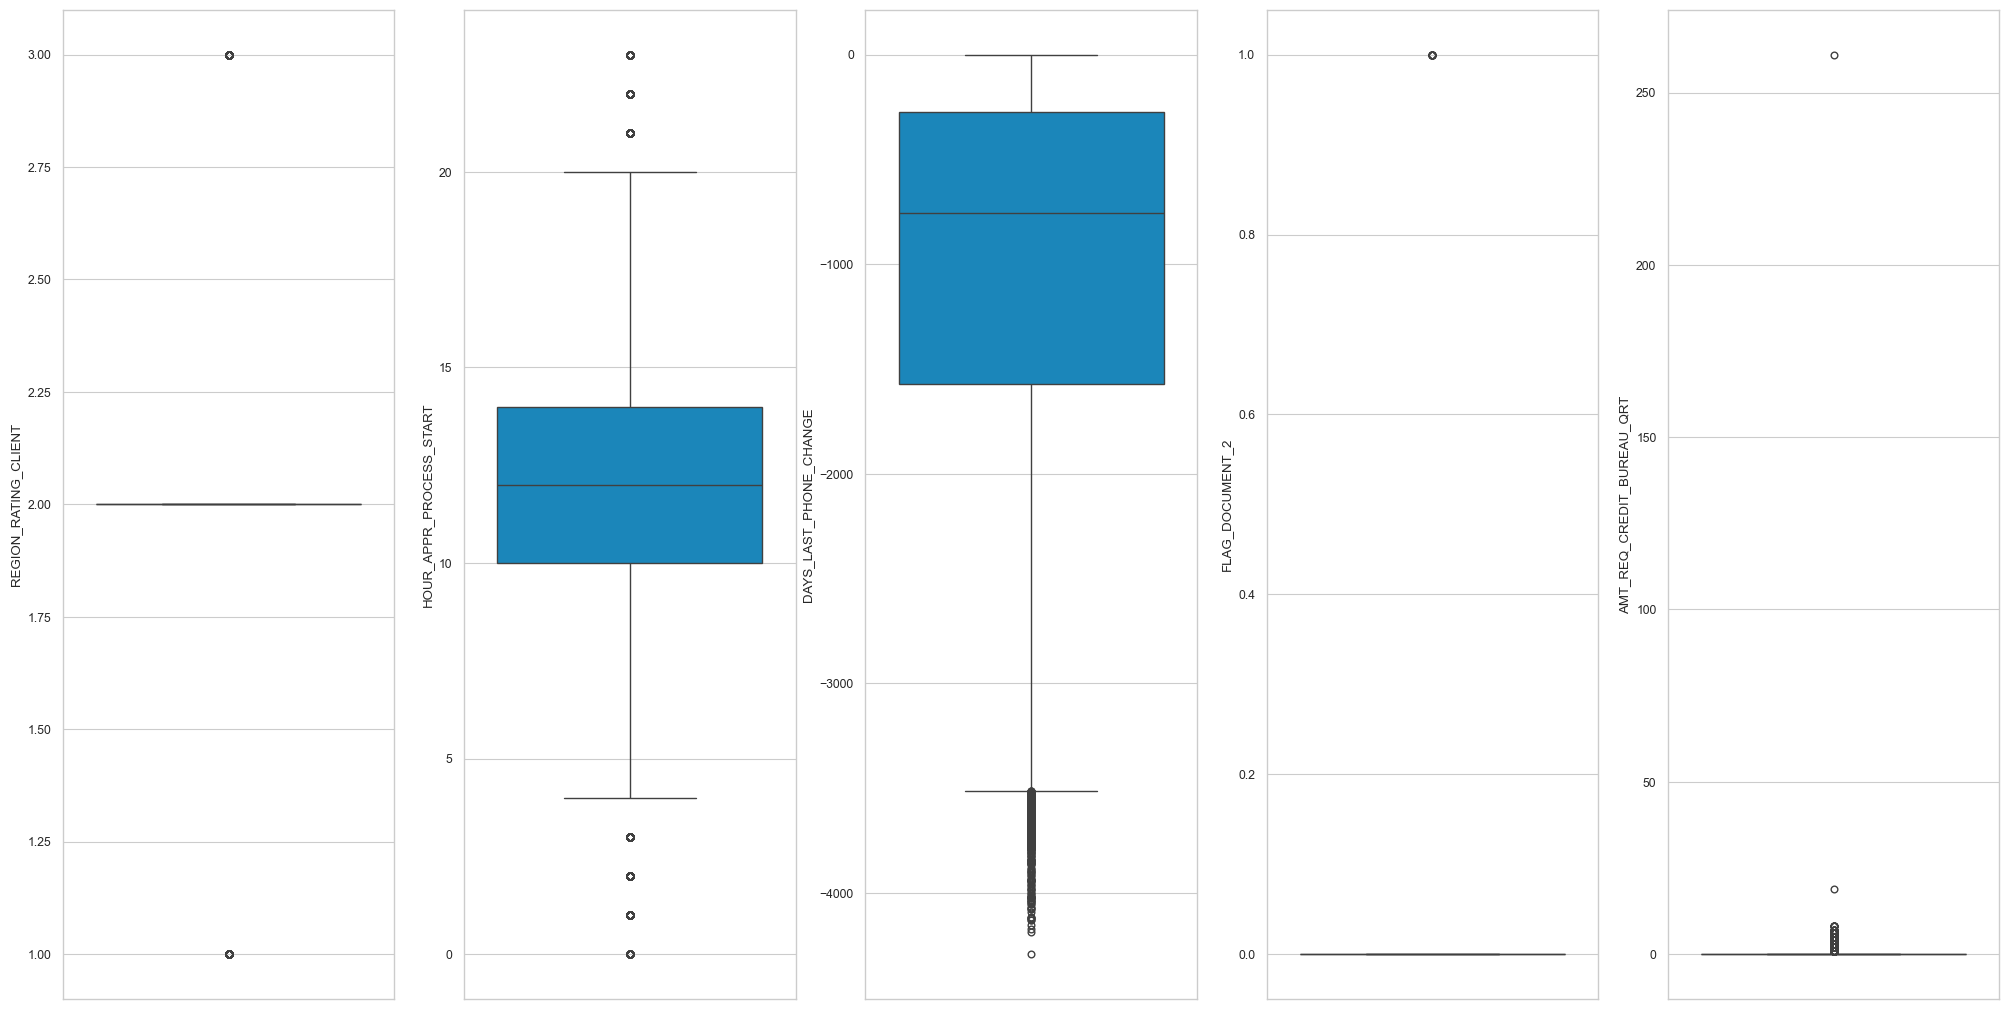

In [70]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
axs = axs.flatten()

for index, (feature, values) in enumerate(num_features.items()):
    if index < 5:
        sns.boxplot(y=feature, data=num_features, ax=axs[index])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Outliers pada fitur numerik yang disebutkan di atas tidak akan dihapus karena mungkin ada wawasan yang dapat diambil dari pencilan ini.

In [71]:
from sklearn.preprocessing import LabelEncoder

# Daftar kolom yang ingin di-label encode
columns_to_encode = [
    "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
    "ORGANIZATION_TYPE", "EMERGENCYSTATE_MODE"
]

# Mengecek panjang kolom sebelum transformasi
original_lengths = {col: len(df_t[col]) for col in columns_to_encode}

# Mengubah kolom-kolom yang ingin di-label encode
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df_t[col] = label_encoder.fit_transform(df_t[col].astype(str))

# Mengecek panjang kolom setelah transformasi
new_lengths = {col: len(df_t[col]) for col in columns_to_encode}

# Memeriksa perubahan panjang kolom setelah transformasi
for col in columns_to_encode:
    if original_lengths[col] != new_lengths[col]:
        print(f"Panjang kolom {col} sebelum dan sesudah transformasi berbeda.")

In [72]:
df_t.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [73]:
## Drop Fitur yang tidak berguna

In [74]:
df_t.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [75]:
df_t.head(1)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
# Mencari kolom dengan nilai negatif
negative_columns = df_t.columns[(df_t < 0).any()]

# Mengonversi nilai negatif ke nilai positif
for col in negative_columns:
    df_t[col] = df_t[col].abs()

# Menampilkan kolom yang telah diubah
print(df_t[negative_columns])

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                       

In [77]:
numeric_columns = df_t.select_dtypes(include='number').columns
negative_columns = df_t[numeric_columns].columns[(df_t[numeric_columns] < 0).any()]

## Feature Selection

In [78]:
x = df_t.drop(['TARGET'], axis=1)
y = df_t['TARGET']

In [79]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('Fitur yang berkorelasi dengan baik dengan fitur target:\n')
featureScores.sort_values(by=['Score'], ascending=False)

Fitur yang berkorelasi dengan baik dengan fitur target:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
...,...,...
40,YEARS_BEGINEXPLUATATION_AVG,1.229669e-02
42,YEARS_BEGINEXPLUATATION_MODE,1.108830e-02
73,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
22,FLAG_CONT_MOBILE,7.863447e-05


Dapat dilihat fitur mana yang berkorelasi dengan baik dengan kesulitan pembayaran.

Best features: DAYS_EMPLOYED, AMT_GOODS_PRICE, and AMT_CREDIT

Worst features: FLAG_MOBIL, FLAG_CONT_MOBILE, and AMT_REQ_CREDIT_BUREAU_HOUR

## Feature Imbalance

In [92]:
from sklearn.utils import resample

# Create two different dataframes for majority and minority classes
df_major = df_t[df_t['TARGET'] == 0]
df_minor = df_t[df_t['TARGET'] == 1]

# Upsample the minority class
df_minor_upsampled = resample(df_minor,
                                 replace=True,
                                 n_samples=df_major.shape[0],
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minor_upsampled, df_major])

In [95]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [96]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [97]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Building

### LogisticRegression

In [98]:
# train the model
log_m = LogisticRegression().fit(X_train, y_train)
print(log_m)

LogisticRegression()


In [99]:
# predict data train
y_train_pred_log = log_m.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



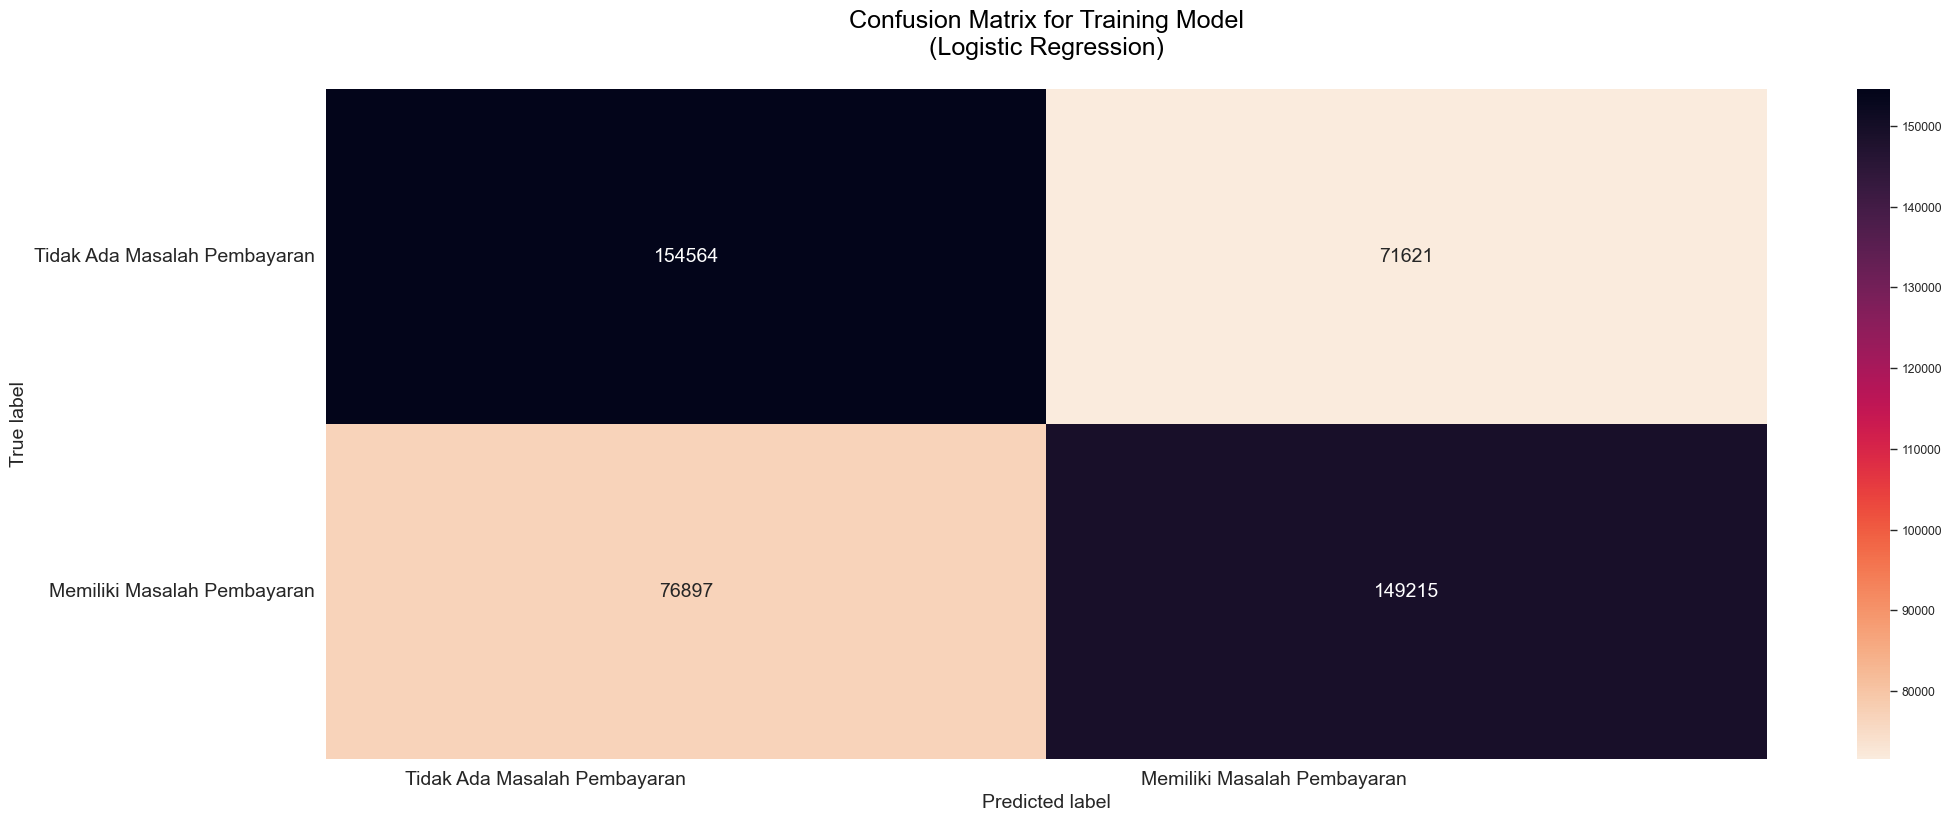

In [111]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
conf_matrix = confusion_matrix(y_train, y_train_pred_log)
confusion_matrix_log = pd.DataFrame(conf_matrix, 
                                    index=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'], 
                                    columns=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'])

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Model Training Logistic Regression)', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [112]:
# predict data test
y_test_pred_log = log_m.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



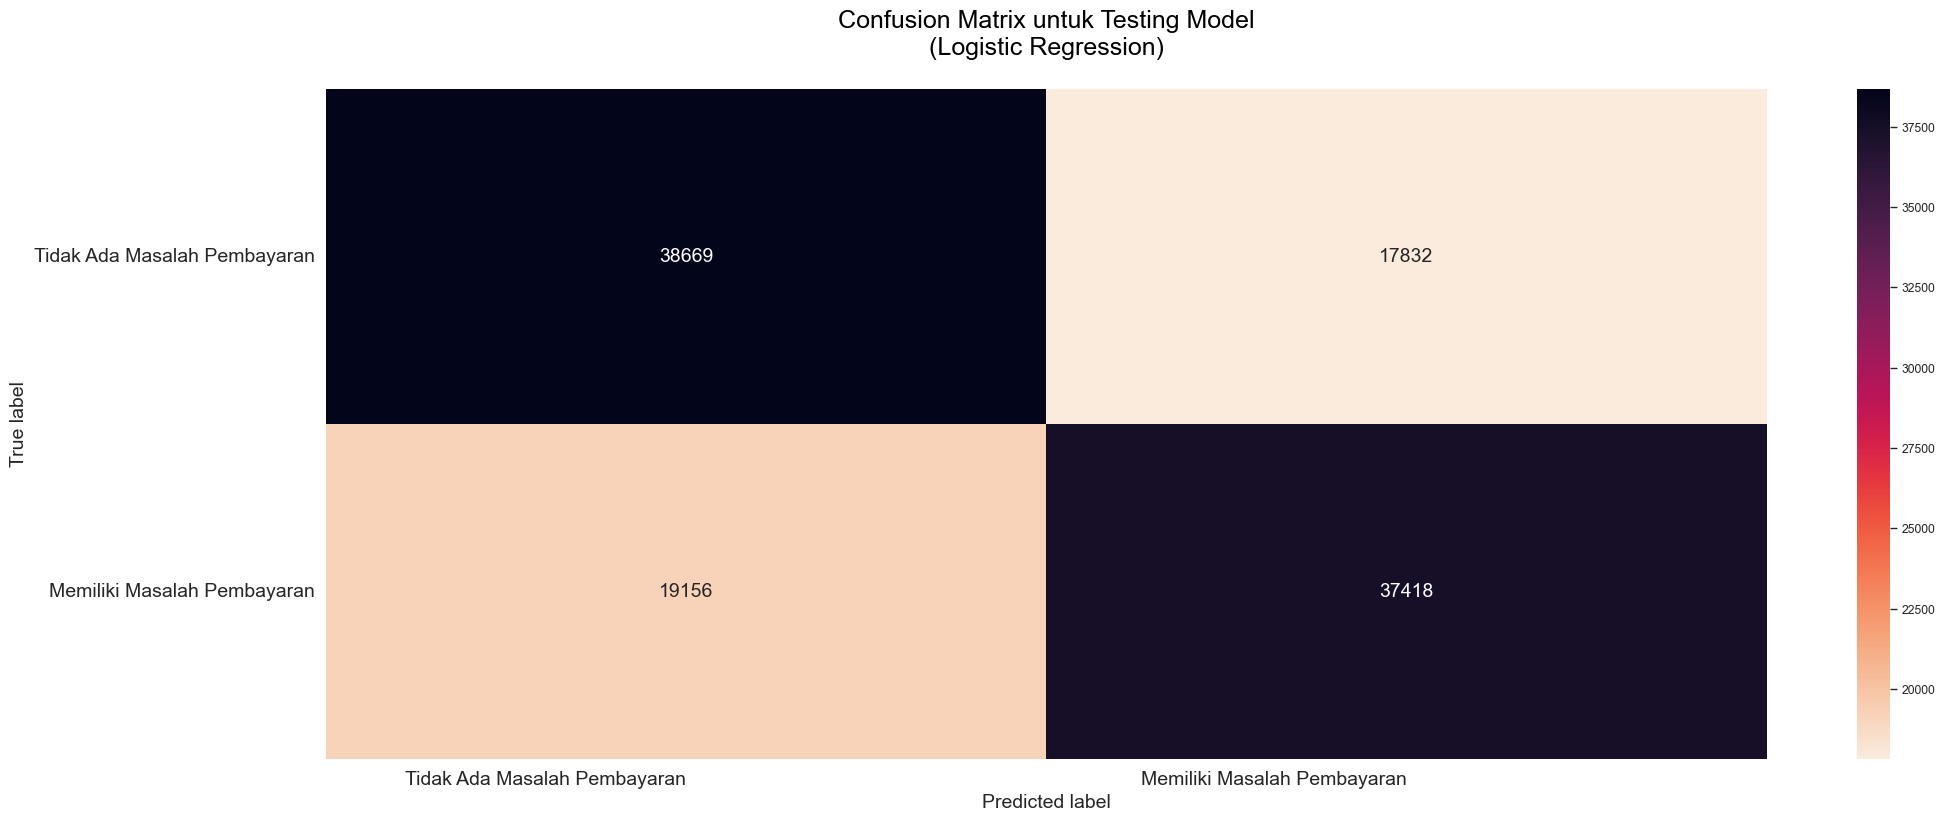

In [114]:
# Form confusion matrix as a DataFrame
conf_matrix = confusion_matrix(y_test, y_test_pred_log)
confusion_matrix_log = pd.DataFrame(conf_matrix, 
                                    index=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'], 
                                    columns=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'])

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Model Testing Logistic Regression', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [115]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training set
acc_log_train = round(accuracy_score(y_train, y_train_pred_log) * 100, 2)

# Calculate accuracy for test set
acc_log_test = round(accuracy_score(y_test, y_test_pred_log) * 100, 2)

print("Training Accuracy: {}%".format(acc_log_train))
print("Test Accuracy: {}%".format(acc_log_test))

Training Accuracy: 67.16%
Test Accuracy: 67.29%


Model logistic regression memberikan hasil yang benar sebesar 67,16%.
Terdapat 0,13% margin kesalahan.

In [121]:
# ROC scores
from sklearn.metrics import roc_auc_score

roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6729


### DecisionTreeClassifier 

In [124]:
from sklearn.tree import DecisionTreeClassifier
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [125]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



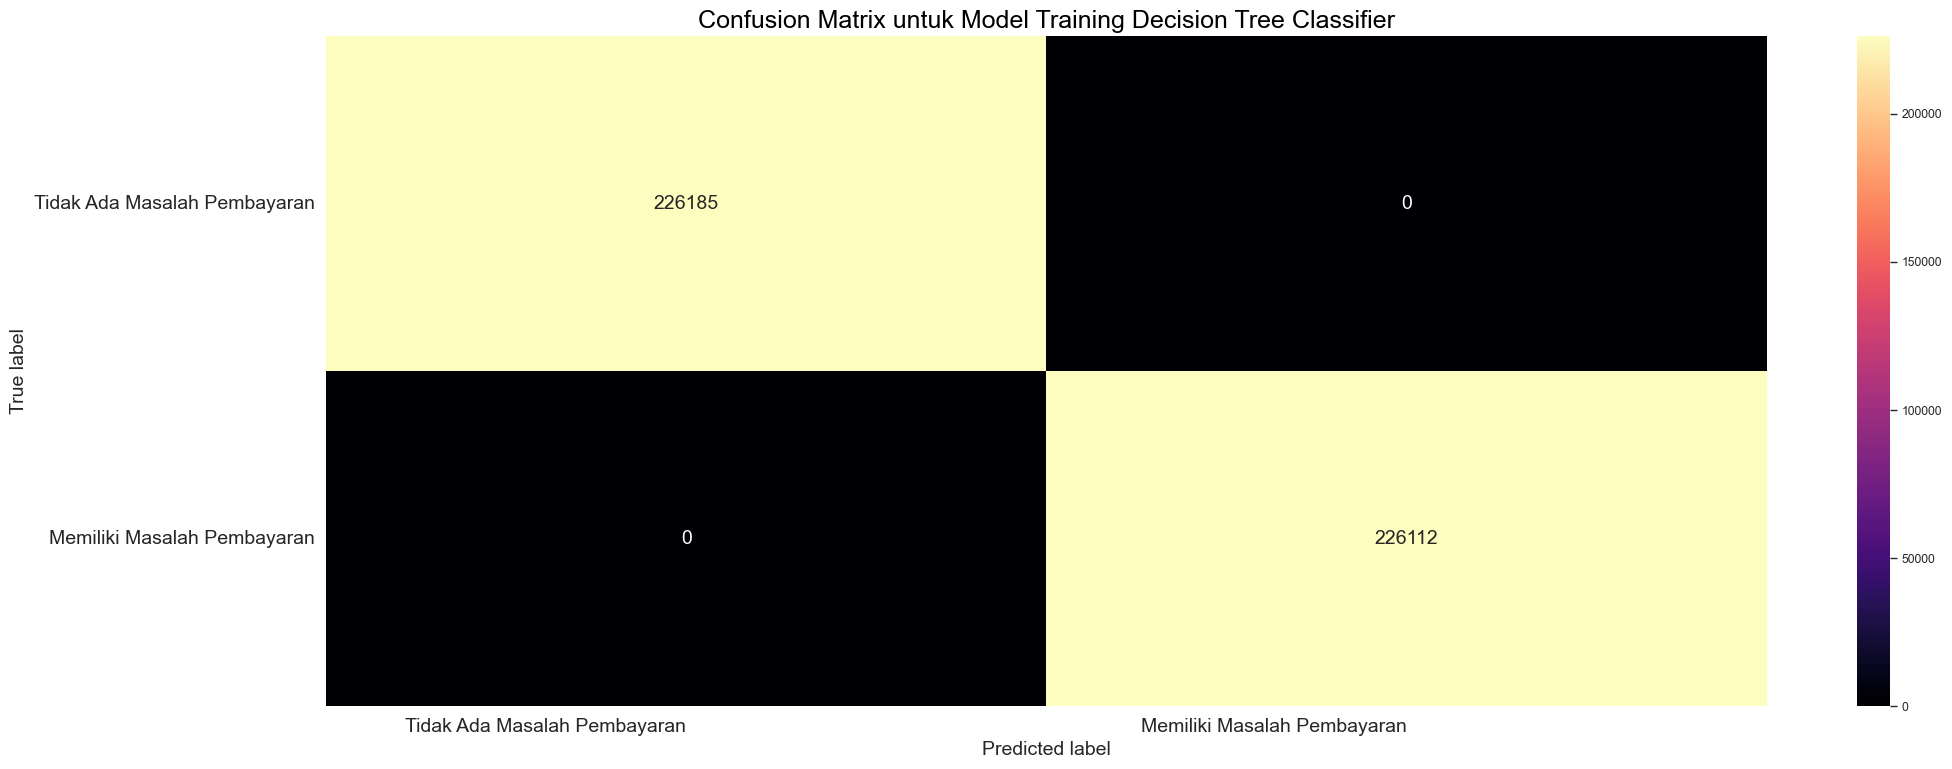

In [131]:
# Form confusion matrix as a DataFrame
confusion_matrix_dt = confusion_matrix(y_train, y_train_pred_dt)
confusion_df_dt = pd.DataFrame(confusion_matrix_dt, 
                               index=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'],
                               columns=['Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'])

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_df_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Model Training Decision Tree Classifier', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [134]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



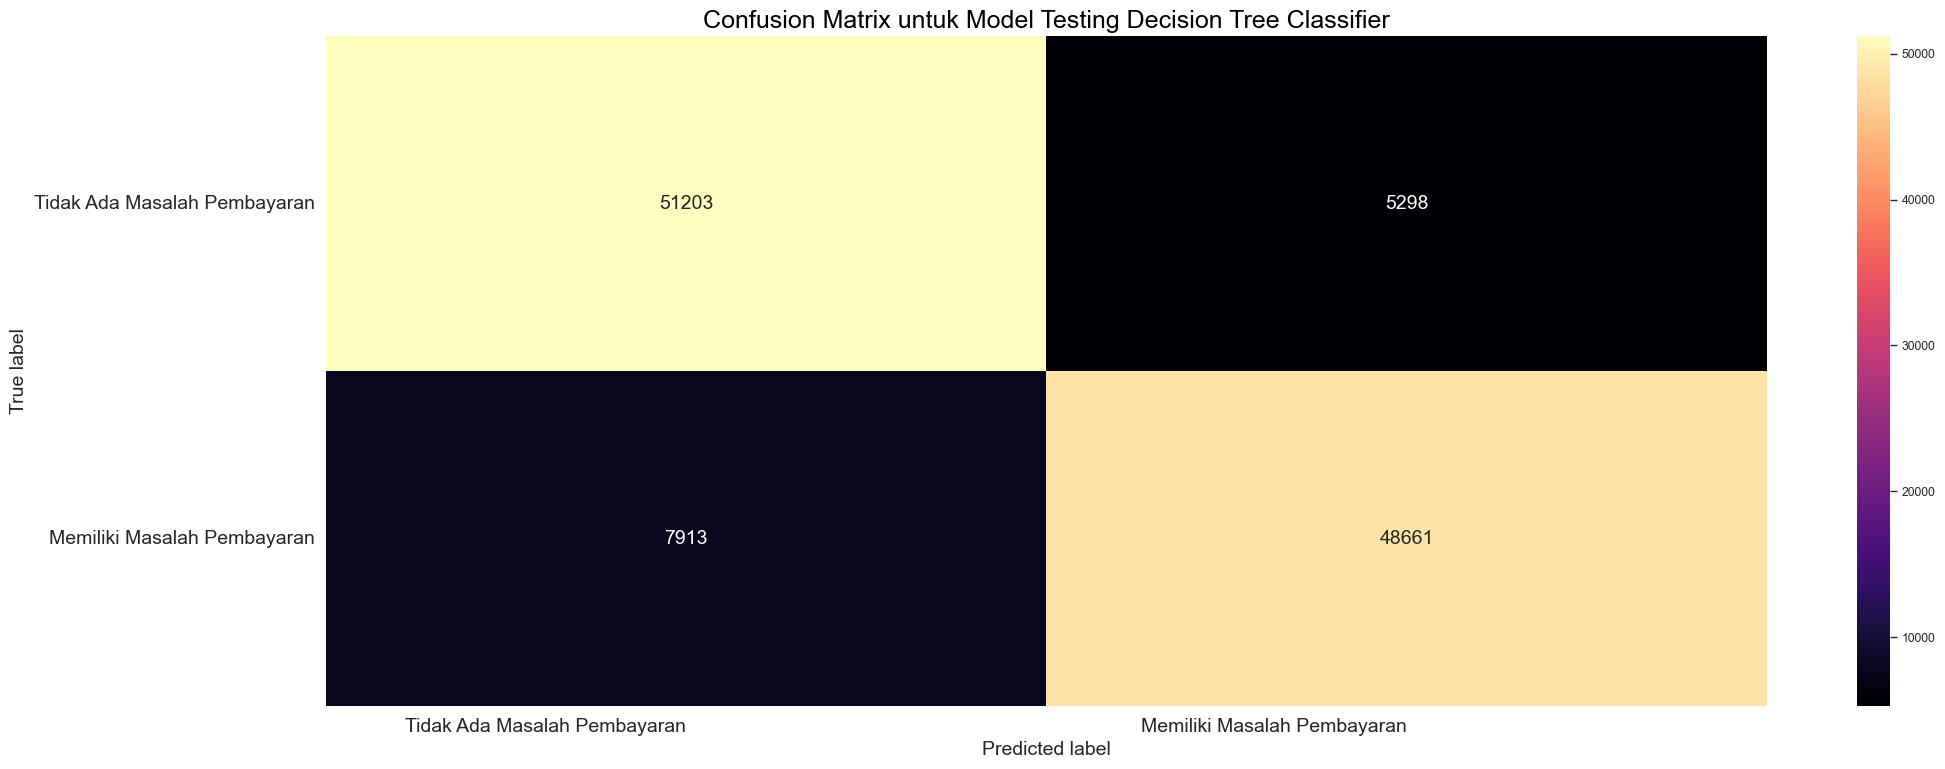

In [136]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'), ('Tidak Ada Masalah Pembayaran', 'Memiliki Masalah Pembayaran'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Model Testing Decision Tree Classifier', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [137]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 88.32


dari hasil diatas keputusan memberikan hasil yang 100% benar.
Terdapat 11,74% margin kesalahan. Ini tidak baik untuk data ini.

In [138]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8832
